In [14]:
import ROOT
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(normalize=False,
                          title=None): 
    pred = {"Training": x_train, "Validation": x_valid, "Test": x_test}
    true = {"Training": y_train, "Validation": y_valid, "Test": y_test}
    fig,ax=plt.subplots(1,3,figsize=(22,5))
    for idx, key in enumerate(pred.keys()):
        y_pred=model.predict(pred[key])
        y_true=true[key]
        cm = confusion_matrix(y_true, y_pred.squeeze())
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
#     Plotting
        sns.heatmap(cm,ax=ax[idx], annot=True, annot_kws={'size':8})
        ax[idx].set_title(key,fontsize=16)
        ax[idx].set_xlabel(xlabel='Predicted label',fontsize=13)
        ax[idx].set_ylabel(ylabel='True label',fontsize=13)
    plt.suptitle(title, fontsize=20)

### True p4 Feature Ranking

In [3]:
points= pickle.load(open('HiggsCP_data/rhorho/events_wo_background.pk','rb'))

In [4]:
particle_name = ['n', 'pi-', 'pi0_1', 'an', 'pi+', 'pi0_2']
affiliated_name =['p_x', 'p_y', 'p_z', 'E']

In [5]:
features_names=[ x+'_'+y for x in particle_name for y in affiliated_name]

In [6]:
x_train, y_train = points.train.x, np.argmax(points.train.weights,axis=1)
x_valid, y_valid = points.valid.x, np.argmax(points.valid.weights,axis=1)
x_test, y_test = points.test.x, np.argmax(points.test.weights,axis=1)

In [17]:
model = CatBoostClassifier(iterations=10000,
                           max_depth=6,
                           task_type="GPU",
                           devices='0', 
#                            early_stopping_rounds=500,
                          )
model.fit(Pool(x_train, y_train),eval_set=Pool(x_valid,y_valid),verbose=True)

Learning rate set to 0.075517
0:	learn: 2.3010948	test: 2.3010919	best: 2.3010919 (0)	total: 22.3ms	remaining: 3m 42s
1:	learn: 2.2971842	test: 2.2972420	best: 2.2972420 (1)	total: 43.7ms	remaining: 3m 38s
2:	learn: 2.2937766	test: 2.2938648	best: 2.2938648 (2)	total: 63ms	remaining: 3m 30s
3:	learn: 2.2909461	test: 2.2910794	best: 2.2910794 (3)	total: 82.1ms	remaining: 3m 25s
4:	learn: 2.2899063	test: 2.2901063	best: 2.2901063 (4)	total: 101ms	remaining: 3m 21s
5:	learn: 2.2879697	test: 2.2882198	best: 2.2882198 (5)	total: 123ms	remaining: 3m 24s
6:	learn: 2.2858781	test: 2.2861856	best: 2.2861856 (6)	total: 145ms	remaining: 3m 26s
7:	learn: 2.2836211	test: 2.2839706	best: 2.2839706 (7)	total: 162ms	remaining: 3m 21s
8:	learn: 2.2825970	test: 2.2829973	best: 2.2829973 (8)	total: 180ms	remaining: 3m 20s
9:	learn: 2.2813672	test: 2.2818144	best: 2.2818144 (9)	total: 195ms	remaining: 3m 14s
10:	learn: 2.2808311	test: 2.2813041	best: 2.2813041 (10)	total: 210ms	remaining: 3m 10s
11:	learn

101:	learn: 2.1529131	test: 2.1566177	best: 2.1566177 (101)	total: 1.66s	remaining: 2m 41s
102:	learn: 2.1523098	test: 2.1560519	best: 2.1560519 (102)	total: 1.68s	remaining: 2m 41s
103:	learn: 2.1515745	test: 2.1553248	best: 2.1553248 (103)	total: 1.7s	remaining: 2m 41s
104:	learn: 2.1503334	test: 2.1541158	best: 2.1541158 (104)	total: 1.71s	remaining: 2m 41s
105:	learn: 2.1499572	test: 2.1537920	best: 2.1537920 (105)	total: 1.73s	remaining: 2m 41s
106:	learn: 2.1484158	test: 2.1523527	best: 2.1523527 (106)	total: 1.75s	remaining: 2m 41s
107:	learn: 2.1461039	test: 2.1499647	best: 2.1499647 (107)	total: 1.76s	remaining: 2m 41s
108:	learn: 2.1446353	test: 2.1485909	best: 2.1485909 (108)	total: 1.78s	remaining: 2m 41s
109:	learn: 2.1442814	test: 2.1482759	best: 2.1482759 (109)	total: 1.8s	remaining: 2m 41s
110:	learn: 2.1437680	test: 2.1478134	best: 2.1478134 (110)	total: 1.81s	remaining: 2m 41s
111:	learn: 2.1423647	test: 2.1464242	best: 2.1464242 (111)	total: 1.83s	remaining: 2m 41s
1

204:	learn: 2.0758627	test: 2.0828408	best: 2.0828408 (204)	total: 3.3s	remaining: 2m 37s
205:	learn: 2.0754744	test: 2.0824628	best: 2.0824628 (205)	total: 3.32s	remaining: 2m 37s
206:	learn: 2.0739158	test: 2.0808606	best: 2.0808606 (206)	total: 3.33s	remaining: 2m 37s
207:	learn: 2.0735644	test: 2.0805255	best: 2.0805255 (207)	total: 3.35s	remaining: 2m 37s
208:	learn: 2.0733634	test: 2.0803545	best: 2.0803545 (208)	total: 3.37s	remaining: 2m 37s
209:	learn: 2.0731380	test: 2.0801503	best: 2.0801503 (209)	total: 3.38s	remaining: 2m 37s
210:	learn: 2.0716345	test: 2.0786492	best: 2.0786492 (210)	total: 3.4s	remaining: 2m 37s
211:	learn: 2.0714630	test: 2.0785153	best: 2.0785153 (211)	total: 3.42s	remaining: 2m 37s
212:	learn: 2.0709695	test: 2.0780648	best: 2.0780648 (212)	total: 3.43s	remaining: 2m 37s
213:	learn: 2.0705402	test: 2.0776564	best: 2.0776564 (213)	total: 3.44s	remaining: 2m 37s
214:	learn: 2.0697817	test: 2.0769230	best: 2.0769230 (214)	total: 3.46s	remaining: 2m 37s
2

305:	learn: 2.0279900	test: 2.0380044	best: 2.0380044 (305)	total: 4.91s	remaining: 2m 35s
306:	learn: 2.0278702	test: 2.0379180	best: 2.0379180 (306)	total: 4.92s	remaining: 2m 35s
307:	learn: 2.0276262	test: 2.0377030	best: 2.0377030 (307)	total: 4.94s	remaining: 2m 35s
308:	learn: 2.0270706	test: 2.0371692	best: 2.0371692 (308)	total: 4.96s	remaining: 2m 35s
309:	learn: 2.0264925	test: 2.0365827	best: 2.0365827 (309)	total: 4.97s	remaining: 2m 35s
310:	learn: 2.0264647	test: 2.0365869	best: 2.0365827 (309)	total: 4.99s	remaining: 2m 35s
311:	learn: 2.0263006	test: 2.0364508	best: 2.0364508 (311)	total: 5s	remaining: 2m 35s
312:	learn: 2.0262595	test: 2.0364372	best: 2.0364372 (312)	total: 5.02s	remaining: 2m 35s
313:	learn: 2.0261495	test: 2.0363466	best: 2.0363466 (313)	total: 5.03s	remaining: 2m 35s
314:	learn: 2.0259650	test: 2.0361975	best: 2.0361975 (314)	total: 5.05s	remaining: 2m 35s
315:	learn: 2.0253322	test: 2.0356037	best: 2.0356037 (315)	total: 5.06s	remaining: 2m 35s
31

396:	learn: 1.9960633	test: 2.0090366	best: 2.0090366 (396)	total: 6.35s	remaining: 2m 33s
397:	learn: 1.9960430	test: 2.0090395	best: 2.0090366 (396)	total: 6.37s	remaining: 2m 33s
398:	learn: 1.9956250	test: 2.0086777	best: 2.0086777 (398)	total: 6.38s	remaining: 2m 33s
399:	learn: 1.9952369	test: 2.0083500	best: 2.0083500 (399)	total: 6.4s	remaining: 2m 33s
400:	learn: 1.9949247	test: 2.0080884	best: 2.0080884 (400)	total: 6.41s	remaining: 2m 33s
401:	learn: 1.9945213	test: 2.0077417	best: 2.0077417 (401)	total: 6.43s	remaining: 2m 33s
402:	learn: 1.9944175	test: 2.0076548	best: 2.0076548 (402)	total: 6.44s	remaining: 2m 33s
403:	learn: 1.9940944	test: 2.0073942	best: 2.0073942 (403)	total: 6.46s	remaining: 2m 33s
404:	learn: 1.9936909	test: 2.0069888	best: 2.0069888 (404)	total: 6.48s	remaining: 2m 33s
405:	learn: 1.9934000	test: 2.0067459	best: 2.0067459 (405)	total: 6.49s	remaining: 2m 33s
406:	learn: 1.9931766	test: 2.0065900	best: 2.0065900 (406)	total: 6.51s	remaining: 2m 33s


499:	learn: 1.9684633	test: 1.9847448	best: 1.9847448 (499)	total: 7.98s	remaining: 2m 31s
500:	learn: 1.9682572	test: 1.9845897	best: 1.9845897 (500)	total: 8s	remaining: 2m 31s
501:	learn: 1.9681384	test: 1.9844880	best: 1.9844880 (501)	total: 8.01s	remaining: 2m 31s
502:	learn: 1.9680183	test: 1.9844194	best: 1.9844194 (502)	total: 8.03s	remaining: 2m 31s
503:	learn: 1.9677669	test: 1.9842100	best: 1.9842100 (503)	total: 8.04s	remaining: 2m 31s
504:	learn: 1.9677420	test: 1.9842106	best: 1.9842100 (503)	total: 8.06s	remaining: 2m 31s
505:	learn: 1.9672514	test: 1.9837809	best: 1.9837809 (505)	total: 8.08s	remaining: 2m 31s
506:	learn: 1.9670064	test: 1.9835562	best: 1.9835562 (506)	total: 8.09s	remaining: 2m 31s
507:	learn: 1.9669337	test: 1.9835325	best: 1.9835325 (507)	total: 8.11s	remaining: 2m 31s
508:	learn: 1.9666167	test: 1.9832364	best: 1.9832364 (508)	total: 8.13s	remaining: 2m 31s
509:	learn: 1.9665645	test: 1.9832269	best: 1.9832269 (509)	total: 8.14s	remaining: 2m 31s
51

590:	learn: 1.9496264	test: 1.9689359	best: 1.9689359 (590)	total: 9.41s	remaining: 2m 29s
591:	learn: 1.9495413	test: 1.9688778	best: 1.9688778 (591)	total: 9.43s	remaining: 2m 29s
592:	learn: 1.9489395	test: 1.9682963	best: 1.9682963 (592)	total: 9.45s	remaining: 2m 29s
593:	learn: 1.9488706	test: 1.9682539	best: 1.9682539 (593)	total: 9.46s	remaining: 2m 29s
594:	learn: 1.9486908	test: 1.9681277	best: 1.9681277 (594)	total: 9.47s	remaining: 2m 29s
595:	learn: 1.9485583	test: 1.9680339	best: 1.9680339 (595)	total: 9.49s	remaining: 2m 29s
596:	learn: 1.9484295	test: 1.9679289	best: 1.9679289 (596)	total: 9.5s	remaining: 2m 29s
597:	learn: 1.9481659	test: 1.9676928	best: 1.9676928 (597)	total: 9.52s	remaining: 2m 29s
598:	learn: 1.9480400	test: 1.9675889	best: 1.9675889 (598)	total: 9.54s	remaining: 2m 29s
599:	learn: 1.9478928	test: 1.9674813	best: 1.9674813 (599)	total: 9.55s	remaining: 2m 29s
600:	learn: 1.9477972	test: 1.9674297	best: 1.9674297 (600)	total: 9.57s	remaining: 2m 29s


693:	learn: 1.9269103	test: 1.9495809	best: 1.9495809 (693)	total: 11s	remaining: 2m 28s
694:	learn: 1.9268061	test: 1.9495197	best: 1.9495197 (694)	total: 11.1s	remaining: 2m 28s
695:	learn: 1.9266719	test: 1.9494255	best: 1.9494255 (695)	total: 11.1s	remaining: 2m 28s
696:	learn: 1.9264766	test: 1.9492528	best: 1.9492528 (696)	total: 11.1s	remaining: 2m 28s
697:	learn: 1.9263322	test: 1.9491592	best: 1.9491592 (697)	total: 11.1s	remaining: 2m 28s
698:	learn: 1.9261844	test: 1.9490212	best: 1.9490212 (698)	total: 11.1s	remaining: 2m 28s
699:	learn: 1.9258828	test: 1.9487647	best: 1.9487647 (699)	total: 11.1s	remaining: 2m 28s
700:	learn: 1.9257369	test: 1.9486667	best: 1.9486667 (700)	total: 11.2s	remaining: 2m 28s
701:	learn: 1.9255816	test: 1.9485569	best: 1.9485569 (701)	total: 11.2s	remaining: 2m 28s
702:	learn: 1.9252920	test: 1.9483136	best: 1.9483136 (702)	total: 11.2s	remaining: 2m 28s
703:	learn: 1.9251286	test: 1.9481953	best: 1.9481953 (703)	total: 11.2s	remaining: 2m 28s
7

785:	learn: 1.9099642	test: 1.9356002	best: 1.9355947 (784)	total: 12.5s	remaining: 2m 26s
786:	learn: 1.9094075	test: 1.9350850	best: 1.9350850 (786)	total: 12.5s	remaining: 2m 26s
787:	learn: 1.9093697	test: 1.9350834	best: 1.9350834 (787)	total: 12.5s	remaining: 2m 26s
788:	learn: 1.9093173	test: 1.9350491	best: 1.9350491 (788)	total: 12.5s	remaining: 2m 26s
789:	learn: 1.9092536	test: 1.9350081	best: 1.9350081 (789)	total: 12.6s	remaining: 2m 26s
790:	learn: 1.9092136	test: 1.9349938	best: 1.9349938 (790)	total: 12.6s	remaining: 2m 26s
791:	learn: 1.9090925	test: 1.9348950	best: 1.9348950 (791)	total: 12.6s	remaining: 2m 26s
792:	learn: 1.9090405	test: 1.9348797	best: 1.9348797 (792)	total: 12.6s	remaining: 2m 26s
793:	learn: 1.9080514	test: 1.9339219	best: 1.9339219 (793)	total: 12.6s	remaining: 2m 26s
794:	learn: 1.9078045	test: 1.9337272	best: 1.9337272 (794)	total: 12.6s	remaining: 2m 26s
795:	learn: 1.9075348	test: 1.9334530	best: 1.9334530 (795)	total: 12.6s	remaining: 2m 26s

876:	learn: 1.8943697	test: 1.9229359	best: 1.9229359 (876)	total: 13.9s	remaining: 2m 24s
877:	learn: 1.8943228	test: 1.9229214	best: 1.9229214 (877)	total: 13.9s	remaining: 2m 24s
878:	learn: 1.8942114	test: 1.9228264	best: 1.9228264 (878)	total: 14s	remaining: 2m 24s
879:	learn: 1.8941452	test: 1.9227808	best: 1.9227808 (879)	total: 14s	remaining: 2m 24s
880:	learn: 1.8941144	test: 1.9227756	best: 1.9227756 (880)	total: 14s	remaining: 2m 24s
881:	learn: 1.8940217	test: 1.9227219	best: 1.9227219 (881)	total: 14s	remaining: 2m 24s
882:	learn: 1.8939670	test: 1.9227000	best: 1.9227000 (882)	total: 14s	remaining: 2m 24s
883:	learn: 1.8937909	test: 1.9225512	best: 1.9225512 (883)	total: 14s	remaining: 2m 24s
884:	learn: 1.8937350	test: 1.9225159	best: 1.9225159 (884)	total: 14.1s	remaining: 2m 24s
885:	learn: 1.8935484	test: 1.9223441	best: 1.9223441 (885)	total: 14.1s	remaining: 2m 24s
886:	learn: 1.8933237	test: 1.9221383	best: 1.9221383 (886)	total: 14.1s	remaining: 2m 24s
887:	learn:

980:	learn: 1.8796159	test: 1.9112716	best: 1.9112716 (980)	total: 15.5s	remaining: 2m 22s
981:	learn: 1.8795434	test: 1.9112211	best: 1.9112211 (981)	total: 15.6s	remaining: 2m 22s
982:	learn: 1.8795033	test: 1.9112094	best: 1.9112094 (982)	total: 15.6s	remaining: 2m 22s
983:	learn: 1.8794394	test: 1.9111825	best: 1.9111825 (983)	total: 15.6s	remaining: 2m 22s
984:	learn: 1.8791534	test: 1.9109550	best: 1.9109550 (984)	total: 15.6s	remaining: 2m 22s
985:	learn: 1.8790819	test: 1.9109033	best: 1.9109033 (985)	total: 15.6s	remaining: 2m 22s
986:	learn: 1.8790017	test: 1.9108633	best: 1.9108633 (986)	total: 15.6s	remaining: 2m 22s
987:	learn: 1.8786445	test: 1.9105505	best: 1.9105505 (987)	total: 15.6s	remaining: 2m 22s
988:	learn: 1.8785758	test: 1.9105398	best: 1.9105398 (988)	total: 15.7s	remaining: 2m 22s
989:	learn: 1.8784383	test: 1.9104422	best: 1.9104422 (989)	total: 15.7s	remaining: 2m 22s
990:	learn: 1.8775664	test: 1.9096073	best: 1.9096073 (990)	total: 15.7s	remaining: 2m 22s

1072:	learn: 1.8662744	test: 1.9006139	best: 1.9006139 (1072)	total: 17s	remaining: 2m 21s
1073:	learn: 1.8659908	test: 1.9003823	best: 1.9003823 (1073)	total: 17s	remaining: 2m 21s
1074:	learn: 1.8659569	test: 1.9003667	best: 1.9003667 (1074)	total: 17s	remaining: 2m 21s
1075:	learn: 1.8658325	test: 1.9002716	best: 1.9002716 (1075)	total: 17s	remaining: 2m 21s
1076:	learn: 1.8655772	test: 1.9000611	best: 1.9000611 (1076)	total: 17s	remaining: 2m 21s
1077:	learn: 1.8655209	test: 1.9000430	best: 1.9000430 (1077)	total: 17s	remaining: 2m 21s
1078:	learn: 1.8654245	test: 1.8999667	best: 1.8999667 (1078)	total: 17.1s	remaining: 2m 21s
1079:	learn: 1.8653695	test: 1.8999492	best: 1.8999492 (1079)	total: 17.1s	remaining: 2m 21s
1080:	learn: 1.8652809	test: 1.8998723	best: 1.8998723 (1080)	total: 17.1s	remaining: 2m 21s
1081:	learn: 1.8652339	test: 1.8998514	best: 1.8998514 (1081)	total: 17.1s	remaining: 2m 21s
1082:	learn: 1.8652034	test: 1.8998489	best: 1.8998489 (1082)	total: 17.1s	remaini

1162:	learn: 1.8542505	test: 1.8913877	best: 1.8913877 (1162)	total: 18.4s	remaining: 2m 19s
1163:	learn: 1.8542191	test: 1.8913809	best: 1.8913809 (1163)	total: 18.4s	remaining: 2m 19s
1164:	learn: 1.8541872	test: 1.8913819	best: 1.8913809 (1163)	total: 18.4s	remaining: 2m 19s
1165:	learn: 1.8541041	test: 1.8913231	best: 1.8913231 (1165)	total: 18.4s	remaining: 2m 19s
1166:	learn: 1.8540219	test: 1.8912692	best: 1.8912692 (1166)	total: 18.5s	remaining: 2m 19s
1167:	learn: 1.8537278	test: 1.8910075	best: 1.8910075 (1167)	total: 18.5s	remaining: 2m 19s
1168:	learn: 1.8536633	test: 1.8909628	best: 1.8909628 (1168)	total: 18.5s	remaining: 2m 19s
1169:	learn: 1.8534758	test: 1.8908067	best: 1.8908067 (1169)	total: 18.5s	remaining: 2m 19s
1170:	learn: 1.8534086	test: 1.8907641	best: 1.8907641 (1170)	total: 18.5s	remaining: 2m 19s
1171:	learn: 1.8533584	test: 1.8907550	best: 1.8907550 (1171)	total: 18.5s	remaining: 2m 19s
1172:	learn: 1.8531855	test: 1.8906136	best: 1.8906136 (1172)	total: 1

1251:	learn: 1.8429006	test: 1.8824772	best: 1.8824772 (1251)	total: 19.8s	remaining: 2m 18s
1252:	learn: 1.8428702	test: 1.8824656	best: 1.8824656 (1252)	total: 19.8s	remaining: 2m 18s
1253:	learn: 1.8428092	test: 1.8824348	best: 1.8824348 (1253)	total: 19.9s	remaining: 2m 18s
1254:	learn: 1.8425677	test: 1.8822258	best: 1.8822258 (1254)	total: 19.9s	remaining: 2m 18s
1255:	learn: 1.8424445	test: 1.8821303	best: 1.8821303 (1255)	total: 19.9s	remaining: 2m 18s
1256:	learn: 1.8424137	test: 1.8821313	best: 1.8821303 (1255)	total: 19.9s	remaining: 2m 18s
1257:	learn: 1.8423864	test: 1.8821287	best: 1.8821287 (1257)	total: 19.9s	remaining: 2m 18s
1258:	learn: 1.8423552	test: 1.8821345	best: 1.8821287 (1257)	total: 19.9s	remaining: 2m 18s
1259:	learn: 1.8421159	test: 1.8819027	best: 1.8819027 (1259)	total: 20s	remaining: 2m 18s
1260:	learn: 1.8420647	test: 1.8818977	best: 1.8818977 (1260)	total: 20s	remaining: 2m 18s
1261:	learn: 1.8420225	test: 1.8818795	best: 1.8818795 (1261)	total: 20s	r

1343:	learn: 1.8328180	test: 1.8749666	best: 1.8749666 (1343)	total: 21.2s	remaining: 2m 16s
1344:	learn: 1.8325731	test: 1.8747620	best: 1.8747620 (1344)	total: 21.3s	remaining: 2m 16s
1345:	learn: 1.8325117	test: 1.8747305	best: 1.8747305 (1345)	total: 21.3s	remaining: 2m 16s
1346:	learn: 1.8324848	test: 1.8747252	best: 1.8747252 (1346)	total: 21.3s	remaining: 2m 16s
1347:	learn: 1.8324425	test: 1.8747183	best: 1.8747183 (1347)	total: 21.3s	remaining: 2m 16s
1348:	learn: 1.8324094	test: 1.8747098	best: 1.8747098 (1348)	total: 21.3s	remaining: 2m 16s
1349:	learn: 1.8323919	test: 1.8747106	best: 1.8747098 (1348)	total: 21.3s	remaining: 2m 16s
1350:	learn: 1.8322862	test: 1.8746306	best: 1.8746306 (1350)	total: 21.4s	remaining: 2m 16s
1351:	learn: 1.8322645	test: 1.8746369	best: 1.8746306 (1350)	total: 21.4s	remaining: 2m 16s
1352:	learn: 1.8322372	test: 1.8746288	best: 1.8746288 (1352)	total: 21.4s	remaining: 2m 16s
1353:	learn: 1.8322006	test: 1.8746247	best: 1.8746247 (1353)	total: 2

1433:	learn: 1.8241255	test: 1.8687887	best: 1.8687887 (1433)	total: 22.7s	remaining: 2m 15s
1434:	learn: 1.8240784	test: 1.8687773	best: 1.8687773 (1434)	total: 22.7s	remaining: 2m 15s
1435:	learn: 1.8237345	test: 1.8684714	best: 1.8684714 (1435)	total: 22.7s	remaining: 2m 15s
1436:	learn: 1.8232030	test: 1.8679925	best: 1.8679925 (1436)	total: 22.7s	remaining: 2m 15s
1437:	learn: 1.8231680	test: 1.8679895	best: 1.8679895 (1437)	total: 22.7s	remaining: 2m 15s
1438:	learn: 1.8231361	test: 1.8679895	best: 1.8679895 (1437)	total: 22.7s	remaining: 2m 15s
1439:	learn: 1.8231089	test: 1.8679848	best: 1.8679848 (1439)	total: 22.8s	remaining: 2m 15s
1440:	learn: 1.8230566	test: 1.8679633	best: 1.8679633 (1440)	total: 22.8s	remaining: 2m 15s
1441:	learn: 1.8229416	test: 1.8678659	best: 1.8678659 (1441)	total: 22.8s	remaining: 2m 15s
1442:	learn: 1.8228375	test: 1.8678092	best: 1.8678092 (1442)	total: 22.8s	remaining: 2m 15s
1443:	learn: 1.8228095	test: 1.8678066	best: 1.8678066 (1443)	total: 2

1525:	learn: 1.8155247	test: 1.8629661	best: 1.8629661 (1525)	total: 24.1s	remaining: 2m 13s
1526:	learn: 1.8154663	test: 1.8629388	best: 1.8629388 (1526)	total: 24.1s	remaining: 2m 13s
1527:	learn: 1.8154405	test: 1.8629308	best: 1.8629308 (1527)	total: 24.1s	remaining: 2m 13s
1528:	learn: 1.8153666	test: 1.8628698	best: 1.8628698 (1528)	total: 24.2s	remaining: 2m 13s
1529:	learn: 1.8153353	test: 1.8628747	best: 1.8628698 (1528)	total: 24.2s	remaining: 2m 13s
1530:	learn: 1.8152139	test: 1.8627813	best: 1.8627813 (1530)	total: 24.2s	remaining: 2m 13s
1531:	learn: 1.8151370	test: 1.8627434	best: 1.8627434 (1531)	total: 24.2s	remaining: 2m 13s
1532:	learn: 1.8149733	test: 1.8626125	best: 1.8626125 (1532)	total: 24.2s	remaining: 2m 13s
1533:	learn: 1.8149008	test: 1.8625730	best: 1.8625730 (1533)	total: 24.2s	remaining: 2m 13s
1534:	learn: 1.8148444	test: 1.8625431	best: 1.8625431 (1534)	total: 24.2s	remaining: 2m 13s
1535:	learn: 1.8143795	test: 1.8621009	best: 1.8621009 (1535)	total: 2

1616:	learn: 1.8073080	test: 1.8572058	best: 1.8572058 (1616)	total: 25.5s	remaining: 2m 12s
1617:	learn: 1.8071827	test: 1.8571112	best: 1.8571112 (1617)	total: 25.6s	remaining: 2m 12s
1618:	learn: 1.8071408	test: 1.8570998	best: 1.8570998 (1618)	total: 25.6s	remaining: 2m 12s
1619:	learn: 1.8071062	test: 1.8570984	best: 1.8570984 (1619)	total: 25.6s	remaining: 2m 12s
1620:	learn: 1.8070250	test: 1.8570500	best: 1.8570500 (1620)	total: 25.6s	remaining: 2m 12s
1621:	learn: 1.8070005	test: 1.8570516	best: 1.8570500 (1620)	total: 25.6s	remaining: 2m 12s
1622:	learn: 1.8068781	test: 1.8569564	best: 1.8569564 (1622)	total: 25.6s	remaining: 2m 12s
1623:	learn: 1.8068314	test: 1.8569280	best: 1.8569280 (1623)	total: 25.6s	remaining: 2m 12s
1624:	learn: 1.8067089	test: 1.8568431	best: 1.8568431 (1624)	total: 25.7s	remaining: 2m 12s
1625:	learn: 1.8066625	test: 1.8568297	best: 1.8568297 (1625)	total: 25.7s	remaining: 2m 12s
1626:	learn: 1.8066431	test: 1.8568322	best: 1.8568297 (1625)	total: 2

1707:	learn: 1.8000817	test: 1.8525352	best: 1.8525352 (1707)	total: 27s	remaining: 2m 10s
1708:	learn: 1.8000506	test: 1.8525278	best: 1.8525278 (1708)	total: 27s	remaining: 2m 10s
1709:	learn: 1.7999981	test: 1.8524980	best: 1.8524980 (1709)	total: 27s	remaining: 2m 10s
1710:	learn: 1.7999486	test: 1.8524906	best: 1.8524906 (1710)	total: 27s	remaining: 2m 10s
1711:	learn: 1.7998700	test: 1.8524339	best: 1.8524339 (1711)	total: 27s	remaining: 2m 10s
1712:	learn: 1.7995472	test: 1.8521314	best: 1.8521314 (1712)	total: 27s	remaining: 2m 10s
1713:	learn: 1.7994028	test: 1.8520395	best: 1.8520395 (1713)	total: 27.1s	remaining: 2m 10s
1714:	learn: 1.7992753	test: 1.8519447	best: 1.8519447 (1714)	total: 27.1s	remaining: 2m 10s
1715:	learn: 1.7991867	test: 1.8518995	best: 1.8518995 (1715)	total: 27.1s	remaining: 2m 10s
1716:	learn: 1.7991634	test: 1.8518948	best: 1.8518948 (1716)	total: 27.1s	remaining: 2m 10s
1717:	learn: 1.7991416	test: 1.8518927	best: 1.8518927 (1717)	total: 27.1s	remaini

1798:	learn: 1.7911622	test: 1.8462092	best: 1.8462092 (1798)	total: 28.4s	remaining: 2m 9s
1799:	learn: 1.7911025	test: 1.8461813	best: 1.8461813 (1799)	total: 28.4s	remaining: 2m 9s
1800:	learn: 1.7910370	test: 1.8461406	best: 1.8461406 (1800)	total: 28.4s	remaining: 2m 9s
1801:	learn: 1.7909847	test: 1.8461136	best: 1.8461136 (1801)	total: 28.4s	remaining: 2m 9s
1802:	learn: 1.7908753	test: 1.8460494	best: 1.8460494 (1802)	total: 28.4s	remaining: 2m 9s
1803:	learn: 1.7906383	test: 1.8458672	best: 1.8458672 (1803)	total: 28.5s	remaining: 2m 9s
1804:	learn: 1.7906031	test: 1.8458634	best: 1.8458634 (1804)	total: 28.5s	remaining: 2m 9s
1805:	learn: 1.7905619	test: 1.8458433	best: 1.8458433 (1805)	total: 28.5s	remaining: 2m 9s
1806:	learn: 1.7905338	test: 1.8458436	best: 1.8458433 (1805)	total: 28.5s	remaining: 2m 9s
1807:	learn: 1.7904756	test: 1.8458131	best: 1.8458131 (1807)	total: 28.5s	remaining: 2m 9s
1808:	learn: 1.7904297	test: 1.8457742	best: 1.8457742 (1808)	total: 28.5s	remai

1892:	learn: 1.7850587	test: 1.8427748	best: 1.8427748 (1892)	total: 29.8s	remaining: 2m 7s
1893:	learn: 1.7848189	test: 1.8425677	best: 1.8425677 (1893)	total: 29.8s	remaining: 2m 7s
1894:	learn: 1.7847781	test: 1.8425537	best: 1.8425537 (1894)	total: 29.8s	remaining: 2m 7s
1895:	learn: 1.7847298	test: 1.8425334	best: 1.8425334 (1895)	total: 29.8s	remaining: 2m 7s
1896:	learn: 1.7846870	test: 1.8425139	best: 1.8425139 (1896)	total: 29.9s	remaining: 2m 7s
1897:	learn: 1.7846359	test: 1.8424858	best: 1.8424858 (1897)	total: 29.9s	remaining: 2m 7s
1898:	learn: 1.7845711	test: 1.8424594	best: 1.8424594 (1898)	total: 29.9s	remaining: 2m 7s
1899:	learn: 1.7845470	test: 1.8424589	best: 1.8424589 (1899)	total: 29.9s	remaining: 2m 7s
1900:	learn: 1.7844781	test: 1.8424195	best: 1.8424195 (1900)	total: 29.9s	remaining: 2m 7s
1901:	learn: 1.7844317	test: 1.8424012	best: 1.8424012 (1901)	total: 29.9s	remaining: 2m 7s
1902:	learn: 1.7843144	test: 1.8423147	best: 1.8423147 (1902)	total: 30s	remaini

1983:	learn: 1.7786067	test: 1.8388250	best: 1.8388250 (1983)	total: 31.2s	remaining: 2m 6s
1984:	learn: 1.7785473	test: 1.8387927	best: 1.8387927 (1984)	total: 31.2s	remaining: 2m 6s
1985:	learn: 1.7785208	test: 1.8387944	best: 1.8387927 (1984)	total: 31.2s	remaining: 2m 6s
1986:	learn: 1.7784391	test: 1.8387314	best: 1.8387314 (1986)	total: 31.3s	remaining: 2m 6s
1987:	learn: 1.7784145	test: 1.8387311	best: 1.8387311 (1987)	total: 31.3s	remaining: 2m 6s
1988:	learn: 1.7783906	test: 1.8387273	best: 1.8387273 (1988)	total: 31.3s	remaining: 2m 6s
1989:	learn: 1.7783625	test: 1.8387336	best: 1.8387273 (1988)	total: 31.3s	remaining: 2m 6s
1990:	learn: 1.7782491	test: 1.8386373	best: 1.8386373 (1990)	total: 31.3s	remaining: 2m 5s
1991:	learn: 1.7782159	test: 1.8386305	best: 1.8386305 (1991)	total: 31.3s	remaining: 2m 5s
1992:	learn: 1.7781897	test: 1.8386300	best: 1.8386300 (1992)	total: 31.4s	remaining: 2m 5s
1993:	learn: 1.7781284	test: 1.8386155	best: 1.8386155 (1993)	total: 31.4s	remai

2074:	learn: 1.7718622	test: 1.8346092	best: 1.8346092 (2074)	total: 32.6s	remaining: 2m 4s
2075:	learn: 1.7718345	test: 1.8346075	best: 1.8346075 (2075)	total: 32.7s	remaining: 2m 4s
2076:	learn: 1.7717473	test: 1.8345486	best: 1.8345486 (2076)	total: 32.7s	remaining: 2m 4s
2077:	learn: 1.7717061	test: 1.8345284	best: 1.8345284 (2077)	total: 32.7s	remaining: 2m 4s
2078:	learn: 1.7716681	test: 1.8345266	best: 1.8345266 (2078)	total: 32.7s	remaining: 2m 4s
2079:	learn: 1.7714931	test: 1.8343758	best: 1.8343758 (2079)	total: 32.7s	remaining: 2m 4s
2080:	learn: 1.7714480	test: 1.8343641	best: 1.8343641 (2080)	total: 32.7s	remaining: 2m 4s
2081:	learn: 1.7713517	test: 1.8342944	best: 1.8342944 (2081)	total: 32.8s	remaining: 2m 4s
2082:	learn: 1.7712214	test: 1.8341933	best: 1.8341933 (2082)	total: 32.8s	remaining: 2m 4s
2083:	learn: 1.7711975	test: 1.8341959	best: 1.8341933 (2082)	total: 32.8s	remaining: 2m 4s
2084:	learn: 1.7709812	test: 1.8340203	best: 1.8340203 (2084)	total: 32.8s	remai

2165:	learn: 1.7659145	test: 1.8311133	best: 1.8311133 (2165)	total: 34.1s	remaining: 2m 3s
2166:	learn: 1.7658752	test: 1.8311064	best: 1.8311064 (2166)	total: 34.1s	remaining: 2m 3s
2167:	learn: 1.7658336	test: 1.8311039	best: 1.8311039 (2167)	total: 34.1s	remaining: 2m 3s
2168:	learn: 1.7657903	test: 1.8310973	best: 1.8310973 (2168)	total: 34.1s	remaining: 2m 3s
2169:	learn: 1.7657556	test: 1.8310948	best: 1.8310948 (2169)	total: 34.1s	remaining: 2m 3s
2170:	learn: 1.7656658	test: 1.8310362	best: 1.8310362 (2170)	total: 34.1s	remaining: 2m 3s
2171:	learn: 1.7656266	test: 1.8310322	best: 1.8310322 (2171)	total: 34.2s	remaining: 2m 3s
2172:	learn: 1.7655889	test: 1.8310295	best: 1.8310295 (2172)	total: 34.2s	remaining: 2m 3s
2173:	learn: 1.7655622	test: 1.8310278	best: 1.8310278 (2173)	total: 34.2s	remaining: 2m 3s
2174:	learn: 1.7655080	test: 1.8310034	best: 1.8310034 (2174)	total: 34.2s	remaining: 2m 3s
2175:	learn: 1.7654908	test: 1.8310048	best: 1.8310034 (2174)	total: 34.2s	remai

2255:	learn: 1.7597039	test: 1.8273636	best: 1.8273636 (2255)	total: 35.5s	remaining: 2m 1s
2256:	learn: 1.7596664	test: 1.8273547	best: 1.8273547 (2256)	total: 35.5s	remaining: 2m 1s
2257:	learn: 1.7594084	test: 1.8271073	best: 1.8271073 (2257)	total: 35.5s	remaining: 2m 1s
2258:	learn: 1.7593723	test: 1.8271044	best: 1.8271044 (2258)	total: 35.6s	remaining: 2m 1s
2259:	learn: 1.7593402	test: 1.8271014	best: 1.8271014 (2259)	total: 35.6s	remaining: 2m 1s
2260:	learn: 1.7592991	test: 1.8270917	best: 1.8270917 (2260)	total: 35.6s	remaining: 2m 1s
2261:	learn: 1.7592483	test: 1.8270636	best: 1.8270636 (2261)	total: 35.6s	remaining: 2m 1s
2262:	learn: 1.7592063	test: 1.8270520	best: 1.8270520 (2262)	total: 35.6s	remaining: 2m 1s
2263:	learn: 1.7591703	test: 1.8270509	best: 1.8270509 (2263)	total: 35.6s	remaining: 2m 1s
2264:	learn: 1.7591488	test: 1.8270567	best: 1.8270509 (2263)	total: 35.6s	remaining: 2m 1s
2265:	learn: 1.7591264	test: 1.8270563	best: 1.8270509 (2263)	total: 35.7s	remai

2346:	learn: 1.7535666	test: 1.8236316	best: 1.8236316 (2346)	total: 36.9s	remaining: 2m
2347:	learn: 1.7535227	test: 1.8236295	best: 1.8236295 (2347)	total: 36.9s	remaining: 2m
2348:	learn: 1.7534525	test: 1.8235987	best: 1.8235987 (2348)	total: 37s	remaining: 2m
2349:	learn: 1.7533841	test: 1.8235595	best: 1.8235595 (2349)	total: 37s	remaining: 2m
2350:	learn: 1.7533539	test: 1.8235653	best: 1.8235595 (2349)	total: 37s	remaining: 2m
2351:	learn: 1.7533119	test: 1.8235495	best: 1.8235495 (2351)	total: 37s	remaining: 2m
2352:	learn: 1.7532786	test: 1.8235352	best: 1.8235352 (2352)	total: 37s	remaining: 2m
2353:	learn: 1.7531120	test: 1.8233870	best: 1.8233870 (2353)	total: 37s	remaining: 2m
2354:	learn: 1.7530653	test: 1.8233750	best: 1.8233750 (2354)	total: 37.1s	remaining: 2m
2355:	learn: 1.7530256	test: 1.8233687	best: 1.8233687 (2355)	total: 37.1s	remaining: 2m
2356:	learn: 1.7530020	test: 1.8233678	best: 1.8233678 (2356)	total: 37.1s	remaining: 2m
2357:	learn: 1.7529695	test: 1.82

2438:	learn: 1.7484566	test: 1.8209403	best: 1.8209403 (2438)	total: 38.3s	remaining: 1m 58s
2439:	learn: 1.7484242	test: 1.8209266	best: 1.8209266 (2439)	total: 38.3s	remaining: 1m 58s
2440:	learn: 1.7483583	test: 1.8208963	best: 1.8208963 (2440)	total: 38.3s	remaining: 1m 58s
2441:	learn: 1.7483092	test: 1.8208703	best: 1.8208703 (2441)	total: 38.4s	remaining: 1m 58s
2442:	learn: 1.7482287	test: 1.8208186	best: 1.8208186 (2442)	total: 38.4s	remaining: 1m 58s
2443:	learn: 1.7481975	test: 1.8208038	best: 1.8208038 (2443)	total: 38.4s	remaining: 1m 58s
2444:	learn: 1.7481602	test: 1.8207861	best: 1.8207861 (2444)	total: 38.4s	remaining: 1m 58s
2445:	learn: 1.7480692	test: 1.8207022	best: 1.8207022 (2445)	total: 38.4s	remaining: 1m 58s
2446:	learn: 1.7480478	test: 1.8207033	best: 1.8207022 (2445)	total: 38.4s	remaining: 1m 58s
2447:	learn: 1.7480181	test: 1.8206919	best: 1.8206919 (2447)	total: 38.5s	remaining: 1m 58s
2448:	learn: 1.7478667	test: 1.8205664	best: 1.8205664 (2448)	total: 3

2530:	learn: 1.7431706	test: 1.8179612	best: 1.8179612 (2530)	total: 39.7s	remaining: 1m 57s
2531:	learn: 1.7430836	test: 1.8179150	best: 1.8179150 (2531)	total: 39.7s	remaining: 1m 57s
2532:	learn: 1.7430625	test: 1.8179212	best: 1.8179150 (2531)	total: 39.7s	remaining: 1m 57s
2533:	learn: 1.7430216	test: 1.8179119	best: 1.8179119 (2533)	total: 39.7s	remaining: 1m 57s
2534:	learn: 1.7429594	test: 1.8178861	best: 1.8178861 (2534)	total: 39.8s	remaining: 1m 57s
2535:	learn: 1.7429341	test: 1.8178783	best: 1.8178783 (2535)	total: 39.8s	remaining: 1m 57s
2536:	learn: 1.7429009	test: 1.8178767	best: 1.8178767 (2536)	total: 39.8s	remaining: 1m 57s
2537:	learn: 1.7428808	test: 1.8178792	best: 1.8178767 (2536)	total: 39.8s	remaining: 1m 57s
2538:	learn: 1.7428614	test: 1.8178806	best: 1.8178767 (2536)	total: 39.8s	remaining: 1m 56s
2539:	learn: 1.7428230	test: 1.8178670	best: 1.8178670 (2539)	total: 39.8s	remaining: 1m 56s
2540:	learn: 1.7427959	test: 1.8178745	best: 1.8178670 (2539)	total: 3

2625:	learn: 1.7371297	test: 1.8144645	best: 1.8144645 (2625)	total: 41.1s	remaining: 1m 55s
2626:	learn: 1.7371067	test: 1.8144650	best: 1.8144645 (2625)	total: 41.1s	remaining: 1m 55s
2627:	learn: 1.7370200	test: 1.8144042	best: 1.8144042 (2627)	total: 41.2s	remaining: 1m 55s
2628:	learn: 1.7369372	test: 1.8143477	best: 1.8143477 (2628)	total: 41.2s	remaining: 1m 55s
2629:	learn: 1.7368806	test: 1.8143147	best: 1.8143147 (2629)	total: 41.2s	remaining: 1m 55s
2630:	learn: 1.7367778	test: 1.8142555	best: 1.8142555 (2630)	total: 41.2s	remaining: 1m 55s
2631:	learn: 1.7364762	test: 1.8139739	best: 1.8139739 (2631)	total: 41.2s	remaining: 1m 55s
2632:	learn: 1.7364411	test: 1.8139742	best: 1.8139739 (2631)	total: 41.2s	remaining: 1m 55s
2633:	learn: 1.7364227	test: 1.8139663	best: 1.8139663 (2633)	total: 41.2s	remaining: 1m 55s
2634:	learn: 1.7363975	test: 1.8139683	best: 1.8139663 (2633)	total: 41.3s	remaining: 1m 55s
2635:	learn: 1.7363372	test: 1.8139308	best: 1.8139308 (2635)	total: 4

2719:	learn: 1.7318383	test: 1.8115552	best: 1.8115547 (2718)	total: 42.6s	remaining: 1m 53s
2720:	learn: 1.7317939	test: 1.8115355	best: 1.8115355 (2720)	total: 42.6s	remaining: 1m 53s
2721:	learn: 1.7317623	test: 1.8115381	best: 1.8115355 (2720)	total: 42.6s	remaining: 1m 53s
2722:	learn: 1.7317508	test: 1.8115391	best: 1.8115355 (2720)	total: 42.6s	remaining: 1m 53s
2723:	learn: 1.7316556	test: 1.8114755	best: 1.8114755 (2723)	total: 42.6s	remaining: 1m 53s
2724:	learn: 1.7316089	test: 1.8114538	best: 1.8114538 (2724)	total: 42.6s	remaining: 1m 53s
2725:	learn: 1.7315422	test: 1.8113980	best: 1.8113980 (2725)	total: 42.6s	remaining: 1m 53s
2726:	learn: 1.7314622	test: 1.8113448	best: 1.8113448 (2726)	total: 42.7s	remaining: 1m 53s
2727:	learn: 1.7314384	test: 1.8113433	best: 1.8113433 (2727)	total: 42.7s	remaining: 1m 53s
2728:	learn: 1.7314014	test: 1.8113208	best: 1.8113208 (2728)	total: 42.7s	remaining: 1m 53s
2729:	learn: 1.7312862	test: 1.8112344	best: 1.8112344 (2729)	total: 4

2812:	learn: 1.7269514	test: 1.8090208	best: 1.8090208 (2812)	total: 44s	remaining: 1m 52s
2813:	learn: 1.7269333	test: 1.8090189	best: 1.8090189 (2813)	total: 44s	remaining: 1m 52s
2814:	learn: 1.7268880	test: 1.8089895	best: 1.8089895 (2814)	total: 44s	remaining: 1m 52s
2815:	learn: 1.7268566	test: 1.8089800	best: 1.8089800 (2815)	total: 44s	remaining: 1m 52s
2816:	learn: 1.7268180	test: 1.8089789	best: 1.8089789 (2816)	total: 44s	remaining: 1m 52s
2817:	learn: 1.7267670	test: 1.8089436	best: 1.8089436 (2817)	total: 44s	remaining: 1m 52s
2818:	learn: 1.7267317	test: 1.8089216	best: 1.8089216 (2818)	total: 44.1s	remaining: 1m 52s
2819:	learn: 1.7267183	test: 1.8089170	best: 1.8089170 (2819)	total: 44.1s	remaining: 1m 52s
2820:	learn: 1.7266037	test: 1.8088225	best: 1.8088225 (2820)	total: 44.1s	remaining: 1m 52s
2821:	learn: 1.7265625	test: 1.8088061	best: 1.8088061 (2821)	total: 44.1s	remaining: 1m 52s
2822:	learn: 1.7265459	test: 1.8088052	best: 1.8088052 (2822)	total: 44.1s	remaini

2903:	learn: 1.7214455	test: 1.8059037	best: 1.8059037 (2903)	total: 45.4s	remaining: 1m 50s
2904:	learn: 1.7213308	test: 1.8058192	best: 1.8058192 (2904)	total: 45.4s	remaining: 1m 50s
2905:	learn: 1.7213006	test: 1.8058245	best: 1.8058192 (2904)	total: 45.4s	remaining: 1m 50s
2906:	learn: 1.7212720	test: 1.8058189	best: 1.8058189 (2906)	total: 45.4s	remaining: 1m 50s
2907:	learn: 1.7212387	test: 1.8058080	best: 1.8058080 (2907)	total: 45.4s	remaining: 1m 50s
2908:	learn: 1.7211377	test: 1.8057341	best: 1.8057341 (2908)	total: 45.5s	remaining: 1m 50s
2909:	learn: 1.7211059	test: 1.8057228	best: 1.8057228 (2909)	total: 45.5s	remaining: 1m 50s
2910:	learn: 1.7210872	test: 1.8057273	best: 1.8057228 (2909)	total: 45.5s	remaining: 1m 50s
2911:	learn: 1.7210453	test: 1.8057111	best: 1.8057111 (2911)	total: 45.5s	remaining: 1m 50s
2912:	learn: 1.7209920	test: 1.8056861	best: 1.8056861 (2912)	total: 45.5s	remaining: 1m 50s
2913:	learn: 1.7209488	test: 1.8056698	best: 1.8056698 (2913)	total: 4

2993:	learn: 1.7162162	test: 1.8029139	best: 1.8029139 (2993)	total: 46.8s	remaining: 1m 49s
2994:	learn: 1.7161855	test: 1.8029038	best: 1.8029038 (2994)	total: 46.8s	remaining: 1m 49s
2995:	learn: 1.7161530	test: 1.8028922	best: 1.8028922 (2995)	total: 46.8s	remaining: 1m 49s
2996:	learn: 1.7160259	test: 1.8027825	best: 1.8027825 (2996)	total: 46.9s	remaining: 1m 49s
2997:	learn: 1.7159958	test: 1.8027750	best: 1.8027750 (2997)	total: 46.9s	remaining: 1m 49s
2998:	learn: 1.7159422	test: 1.8027477	best: 1.8027477 (2998)	total: 46.9s	remaining: 1m 49s
2999:	learn: 1.7159091	test: 1.8027455	best: 1.8027455 (2999)	total: 46.9s	remaining: 1m 49s
3000:	learn: 1.7158770	test: 1.8027427	best: 1.8027427 (3000)	total: 46.9s	remaining: 1m 49s
3001:	learn: 1.7158525	test: 1.8027419	best: 1.8027419 (3001)	total: 46.9s	remaining: 1m 49s
3002:	learn: 1.7157792	test: 1.8026995	best: 1.8026995 (3002)	total: 47s	remaining: 1m 49s
3003:	learn: 1.7157470	test: 1.8027036	best: 1.8026995 (3002)	total: 47s

3084:	learn: 1.7114173	test: 1.8004700	best: 1.8004700 (3084)	total: 48.2s	remaining: 1m 48s
3085:	learn: 1.7113809	test: 1.8004552	best: 1.8004552 (3085)	total: 48.2s	remaining: 1m 48s
3086:	learn: 1.7113314	test: 1.8004292	best: 1.8004292 (3086)	total: 48.2s	remaining: 1m 48s
3087:	learn: 1.7113108	test: 1.8004352	best: 1.8004292 (3086)	total: 48.3s	remaining: 1m 48s
3088:	learn: 1.7112841	test: 1.8004383	best: 1.8004292 (3086)	total: 48.3s	remaining: 1m 48s
3089:	learn: 1.7112666	test: 1.8004372	best: 1.8004292 (3086)	total: 48.3s	remaining: 1m 47s
3090:	learn: 1.7111152	test: 1.8003120	best: 1.8003120 (3090)	total: 48.3s	remaining: 1m 47s
3091:	learn: 1.7110900	test: 1.8003039	best: 1.8003039 (3091)	total: 48.3s	remaining: 1m 47s
3092:	learn: 1.7110603	test: 1.8002998	best: 1.8002998 (3092)	total: 48.3s	remaining: 1m 47s
3093:	learn: 1.7109736	test: 1.8002475	best: 1.8002475 (3093)	total: 48.4s	remaining: 1m 47s
3094:	learn: 1.7109556	test: 1.8002514	best: 1.8002475 (3093)	total: 4

3176:	learn: 1.7063091	test: 1.7974241	best: 1.7974241 (3176)	total: 49.6s	remaining: 1m 46s
3177:	learn: 1.7062641	test: 1.7974042	best: 1.7974042 (3177)	total: 49.6s	remaining: 1m 46s
3178:	learn: 1.7061611	test: 1.7973322	best: 1.7973322 (3178)	total: 49.6s	remaining: 1m 46s
3179:	learn: 1.7061397	test: 1.7973311	best: 1.7973311 (3179)	total: 49.7s	remaining: 1m 46s
3180:	learn: 1.7060711	test: 1.7972984	best: 1.7972984 (3180)	total: 49.7s	remaining: 1m 46s
3181:	learn: 1.7058877	test: 1.7971241	best: 1.7971241 (3181)	total: 49.7s	remaining: 1m 46s
3182:	learn: 1.7058325	test: 1.7970900	best: 1.7970900 (3182)	total: 49.7s	remaining: 1m 46s
3183:	learn: 1.7057948	test: 1.7970795	best: 1.7970795 (3183)	total: 49.7s	remaining: 1m 46s
3184:	learn: 1.7057200	test: 1.7970369	best: 1.7970369 (3184)	total: 49.7s	remaining: 1m 46s
3185:	learn: 1.7056930	test: 1.7970395	best: 1.7970369 (3184)	total: 49.7s	remaining: 1m 46s
3186:	learn: 1.7056005	test: 1.7969750	best: 1.7969750 (3186)	total: 4

3267:	learn: 1.7011056	test: 1.7945844	best: 1.7945738 (3266)	total: 51s	remaining: 1m 45s
3268:	learn: 1.7010491	test: 1.7945591	best: 1.7945591 (3268)	total: 51s	remaining: 1m 45s
3269:	learn: 1.7009569	test: 1.7944848	best: 1.7944848 (3269)	total: 51.1s	remaining: 1m 45s
3270:	learn: 1.7009136	test: 1.7944766	best: 1.7944766 (3270)	total: 51.1s	remaining: 1m 45s
3271:	learn: 1.7008447	test: 1.7944352	best: 1.7944352 (3271)	total: 51.1s	remaining: 1m 45s
3272:	learn: 1.7007955	test: 1.7944137	best: 1.7944137 (3272)	total: 51.1s	remaining: 1m 45s
3273:	learn: 1.7007659	test: 1.7944116	best: 1.7944116 (3273)	total: 51.1s	remaining: 1m 45s
3274:	learn: 1.7007011	test: 1.7943813	best: 1.7943813 (3274)	total: 51.1s	remaining: 1m 45s
3275:	learn: 1.7006858	test: 1.7943830	best: 1.7943813 (3274)	total: 51.1s	remaining: 1m 44s
3276:	learn: 1.7006470	test: 1.7943747	best: 1.7943747 (3276)	total: 51.2s	remaining: 1m 44s
3277:	learn: 1.7006211	test: 1.7943823	best: 1.7943747 (3276)	total: 51.2s

3360:	learn: 1.6953498	test: 1.7910444	best: 1.7910422 (3358)	total: 52.4s	remaining: 1m 43s
3361:	learn: 1.6953255	test: 1.7910498	best: 1.7910422 (3358)	total: 52.5s	remaining: 1m 43s
3362:	learn: 1.6952378	test: 1.7909764	best: 1.7909764 (3362)	total: 52.5s	remaining: 1m 43s
3363:	learn: 1.6952197	test: 1.7909759	best: 1.7909759 (3363)	total: 52.5s	remaining: 1m 43s
3364:	learn: 1.6951281	test: 1.7909153	best: 1.7909153 (3364)	total: 52.5s	remaining: 1m 43s
3365:	learn: 1.6951013	test: 1.7909152	best: 1.7909152 (3365)	total: 52.5s	remaining: 1m 43s
3366:	learn: 1.6950808	test: 1.7909178	best: 1.7909152 (3365)	total: 52.5s	remaining: 1m 43s
3367:	learn: 1.6950548	test: 1.7909091	best: 1.7909091 (3367)	total: 52.5s	remaining: 1m 43s
3368:	learn: 1.6950214	test: 1.7909052	best: 1.7909052 (3368)	total: 52.6s	remaining: 1m 43s
3369:	learn: 1.6949927	test: 1.7909033	best: 1.7909033 (3369)	total: 52.6s	remaining: 1m 43s
3370:	learn: 1.6949195	test: 1.7908652	best: 1.7908652 (3370)	total: 5

3456:	learn: 1.6912428	test: 1.7892691	best: 1.7892680 (3455)	total: 53.9s	remaining: 1m 41s
3457:	learn: 1.6912264	test: 1.7892737	best: 1.7892680 (3455)	total: 53.9s	remaining: 1m 41s
3458:	learn: 1.6911992	test: 1.7892748	best: 1.7892680 (3455)	total: 53.9s	remaining: 1m 41s
3459:	learn: 1.6911709	test: 1.7892713	best: 1.7892680 (3455)	total: 53.9s	remaining: 1m 41s
3460:	learn: 1.6911359	test: 1.7892677	best: 1.7892677 (3460)	total: 53.9s	remaining: 1m 41s
3461:	learn: 1.6910950	test: 1.7892453	best: 1.7892453 (3461)	total: 53.9s	remaining: 1m 41s
3462:	learn: 1.6910556	test: 1.7892155	best: 1.7892155 (3462)	total: 53.9s	remaining: 1m 41s
3463:	learn: 1.6910008	test: 1.7891958	best: 1.7891958 (3463)	total: 54s	remaining: 1m 41s
3464:	learn: 1.6909445	test: 1.7891719	best: 1.7891719 (3464)	total: 54s	remaining: 1m 41s
3465:	learn: 1.6909117	test: 1.7891563	best: 1.7891563 (3465)	total: 54s	remaining: 1m 41s
3466:	learn: 1.6908569	test: 1.7891228	best: 1.7891228 (3466)	total: 54s	rem

3551:	learn: 1.6863917	test: 1.7865839	best: 1.7865839 (3551)	total: 55.3s	remaining: 1m 40s
3552:	learn: 1.6863673	test: 1.7865803	best: 1.7865803 (3552)	total: 55.3s	remaining: 1m 40s
3553:	learn: 1.6863139	test: 1.7865487	best: 1.7865487 (3553)	total: 55.3s	remaining: 1m 40s
3554:	learn: 1.6862352	test: 1.7864878	best: 1.7864878 (3554)	total: 55.3s	remaining: 1m 40s
3555:	learn: 1.6861547	test: 1.7864373	best: 1.7864373 (3555)	total: 55.3s	remaining: 1m 40s
3556:	learn: 1.6861219	test: 1.7864288	best: 1.7864288 (3556)	total: 55.4s	remaining: 1m 40s
3557:	learn: 1.6860564	test: 1.7863841	best: 1.7863841 (3557)	total: 55.4s	remaining: 1m 40s
3558:	learn: 1.6856738	test: 1.7859884	best: 1.7859884 (3558)	total: 55.4s	remaining: 1m 40s
3559:	learn: 1.6856364	test: 1.7859727	best: 1.7859727 (3559)	total: 55.4s	remaining: 1m 40s
3560:	learn: 1.6856131	test: 1.7859697	best: 1.7859697 (3560)	total: 55.4s	remaining: 1m 40s
3561:	learn: 1.6855673	test: 1.7859428	best: 1.7859428 (3561)	total: 5

3645:	learn: 1.6812281	test: 1.7836095	best: 1.7836095 (3645)	total: 56.7s	remaining: 1m 38s
3646:	learn: 1.6811648	test: 1.7835730	best: 1.7835730 (3646)	total: 56.7s	remaining: 1m 38s
3647:	learn: 1.6811275	test: 1.7835681	best: 1.7835681 (3647)	total: 56.7s	remaining: 1m 38s
3648:	learn: 1.6811025	test: 1.7835608	best: 1.7835608 (3648)	total: 56.7s	remaining: 1m 38s
3649:	learn: 1.6810763	test: 1.7835478	best: 1.7835478 (3649)	total: 56.8s	remaining: 1m 38s
3650:	learn: 1.6810444	test: 1.7835430	best: 1.7835430 (3650)	total: 56.8s	remaining: 1m 38s
3651:	learn: 1.6810345	test: 1.7835477	best: 1.7835430 (3650)	total: 56.8s	remaining: 1m 38s
3652:	learn: 1.6810098	test: 1.7835391	best: 1.7835391 (3652)	total: 56.8s	remaining: 1m 38s
3653:	learn: 1.6809547	test: 1.7835161	best: 1.7835161 (3653)	total: 56.8s	remaining: 1m 38s
3654:	learn: 1.6808825	test: 1.7834686	best: 1.7834686 (3654)	total: 56.8s	remaining: 1m 38s
3655:	learn: 1.6808480	test: 1.7834558	best: 1.7834558 (3655)	total: 5

3737:	learn: 1.6765808	test: 1.7811689	best: 1.7811689 (3737)	total: 58.1s	remaining: 1m 37s
3738:	learn: 1.6765320	test: 1.7811517	best: 1.7811517 (3738)	total: 58.1s	remaining: 1m 37s
3739:	learn: 1.6764838	test: 1.7811387	best: 1.7811387 (3739)	total: 58.1s	remaining: 1m 37s
3740:	learn: 1.6763244	test: 1.7810189	best: 1.7810189 (3740)	total: 58.1s	remaining: 1m 37s
3741:	learn: 1.6763033	test: 1.7810208	best: 1.7810189 (3740)	total: 58.2s	remaining: 1m 37s
3742:	learn: 1.6762695	test: 1.7810042	best: 1.7810042 (3742)	total: 58.2s	remaining: 1m 37s
3743:	learn: 1.6762314	test: 1.7809905	best: 1.7809905 (3743)	total: 58.2s	remaining: 1m 37s
3744:	learn: 1.6762081	test: 1.7809927	best: 1.7809905 (3743)	total: 58.2s	remaining: 1m 37s
3745:	learn: 1.6761666	test: 1.7809903	best: 1.7809903 (3745)	total: 58.2s	remaining: 1m 37s
3746:	learn: 1.6760512	test: 1.7808920	best: 1.7808920 (3746)	total: 58.2s	remaining: 1m 37s
3747:	learn: 1.6760225	test: 1.7808908	best: 1.7808908 (3747)	total: 5

3830:	learn: 1.6713141	test: 1.7780706	best: 1.7780706 (3830)	total: 59.5s	remaining: 1m 35s
3831:	learn: 1.6712369	test: 1.7780038	best: 1.7780038 (3831)	total: 59.5s	remaining: 1m 35s
3832:	learn: 1.6711863	test: 1.7779697	best: 1.7779697 (3832)	total: 59.6s	remaining: 1m 35s
3833:	learn: 1.6709553	test: 1.7777509	best: 1.7777509 (3833)	total: 59.6s	remaining: 1m 35s
3834:	learn: 1.6707808	test: 1.7775770	best: 1.7775770 (3834)	total: 59.6s	remaining: 1m 35s
3835:	learn: 1.6707280	test: 1.7775517	best: 1.7775517 (3835)	total: 59.6s	remaining: 1m 35s
3836:	learn: 1.6706694	test: 1.7775219	best: 1.7775219 (3836)	total: 59.6s	remaining: 1m 35s
3837:	learn: 1.6706375	test: 1.7775147	best: 1.7775147 (3837)	total: 59.6s	remaining: 1m 35s
3838:	learn: 1.6706167	test: 1.7775122	best: 1.7775122 (3838)	total: 59.7s	remaining: 1m 35s
3839:	learn: 1.6705580	test: 1.7774855	best: 1.7774855 (3839)	total: 59.7s	remaining: 1m 35s
3840:	learn: 1.6705041	test: 1.7774538	best: 1.7774538 (3840)	total: 5

3921:	learn: 1.6667925	test: 1.7757156	best: 1.7757041 (3918)	total: 1m	remaining: 1m 34s
3922:	learn: 1.6667675	test: 1.7757102	best: 1.7757041 (3918)	total: 1m	remaining: 1m 34s
3923:	learn: 1.6667297	test: 1.7756930	best: 1.7756930 (3923)	total: 1m	remaining: 1m 34s
3924:	learn: 1.6667042	test: 1.7756922	best: 1.7756922 (3924)	total: 1m	remaining: 1m 34s
3925:	learn: 1.6666661	test: 1.7756614	best: 1.7756614 (3925)	total: 1m	remaining: 1m 34s
3926:	learn: 1.6666209	test: 1.7756480	best: 1.7756480 (3926)	total: 1m 1s	remaining: 1m 34s
3927:	learn: 1.6665400	test: 1.7755984	best: 1.7755984 (3927)	total: 1m 1s	remaining: 1m 34s
3928:	learn: 1.6664883	test: 1.7755784	best: 1.7755784 (3928)	total: 1m 1s	remaining: 1m 34s
3929:	learn: 1.6663725	test: 1.7754912	best: 1.7754912 (3929)	total: 1m 1s	remaining: 1m 34s
3930:	learn: 1.6663270	test: 1.7754797	best: 1.7754797 (3930)	total: 1m 1s	remaining: 1m 34s
3931:	learn: 1.6663028	test: 1.7754780	best: 1.7754780 (3931)	total: 1m 1s	remaining:

4012:	learn: 1.6626953	test: 1.7738106	best: 1.7738106 (4012)	total: 1m 2s	remaining: 1m 32s
4013:	learn: 1.6626778	test: 1.7738089	best: 1.7738089 (4013)	total: 1m 2s	remaining: 1m 32s
4014:	learn: 1.6626305	test: 1.7737933	best: 1.7737933 (4014)	total: 1m 2s	remaining: 1m 32s
4015:	learn: 1.6625967	test: 1.7737861	best: 1.7737861 (4015)	total: 1m 2s	remaining: 1m 32s
4016:	learn: 1.6625713	test: 1.7737808	best: 1.7737808 (4016)	total: 1m 2s	remaining: 1m 32s
4017:	learn: 1.6625445	test: 1.7737755	best: 1.7737755 (4017)	total: 1m 2s	remaining: 1m 32s
4018:	learn: 1.6624805	test: 1.7737416	best: 1.7737416 (4018)	total: 1m 2s	remaining: 1m 32s
4019:	learn: 1.6624597	test: 1.7737413	best: 1.7737413 (4019)	total: 1m 2s	remaining: 1m 32s
4020:	learn: 1.6624302	test: 1.7737428	best: 1.7737413 (4019)	total: 1m 2s	remaining: 1m 32s
4021:	learn: 1.6624013	test: 1.7737442	best: 1.7737413 (4019)	total: 1m 2s	remaining: 1m 32s
4022:	learn: 1.6623444	test: 1.7737131	best: 1.7737131 (4022)	total: 1

4105:	learn: 1.6587687	test: 1.7720753	best: 1.7720753 (4105)	total: 1m 3s	remaining: 1m 31s
4106:	learn: 1.6587248	test: 1.7720458	best: 1.7720458 (4106)	total: 1m 3s	remaining: 1m 31s
4107:	learn: 1.6586889	test: 1.7720291	best: 1.7720291 (4107)	total: 1m 3s	remaining: 1m 31s
4108:	learn: 1.6586744	test: 1.7720273	best: 1.7720273 (4108)	total: 1m 3s	remaining: 1m 31s
4109:	learn: 1.6586398	test: 1.7720148	best: 1.7720148 (4109)	total: 1m 3s	remaining: 1m 31s
4110:	learn: 1.6584919	test: 1.7718906	best: 1.7718906 (4110)	total: 1m 3s	remaining: 1m 31s
4111:	learn: 1.6584583	test: 1.7718734	best: 1.7718734 (4111)	total: 1m 3s	remaining: 1m 31s
4112:	learn: 1.6584300	test: 1.7718652	best: 1.7718652 (4112)	total: 1m 3s	remaining: 1m 31s
4113:	learn: 1.6583552	test: 1.7718234	best: 1.7718234 (4113)	total: 1m 3s	remaining: 1m 31s
4114:	learn: 1.6583156	test: 1.7718064	best: 1.7718064 (4114)	total: 1m 3s	remaining: 1m 31s
4115:	learn: 1.6582714	test: 1.7717816	best: 1.7717816 (4115)	total: 1

4200:	learn: 1.6542495	test: 1.7697855	best: 1.7697791 (4199)	total: 1m 5s	remaining: 1m 29s
4201:	learn: 1.6542175	test: 1.7697880	best: 1.7697791 (4199)	total: 1m 5s	remaining: 1m 29s
4202:	learn: 1.6541534	test: 1.7697589	best: 1.7697589 (4202)	total: 1m 5s	remaining: 1m 29s
4203:	learn: 1.6541398	test: 1.7697548	best: 1.7697548 (4203)	total: 1m 5s	remaining: 1m 29s
4204:	learn: 1.6541031	test: 1.7697477	best: 1.7697477 (4204)	total: 1m 5s	remaining: 1m 29s
4205:	learn: 1.6540017	test: 1.7696731	best: 1.7696731 (4205)	total: 1m 5s	remaining: 1m 29s
4206:	learn: 1.6539642	test: 1.7696680	best: 1.7696680 (4206)	total: 1m 5s	remaining: 1m 29s
4207:	learn: 1.6539420	test: 1.7696617	best: 1.7696617 (4207)	total: 1m 5s	remaining: 1m 29s
4208:	learn: 1.6538898	test: 1.7696378	best: 1.7696378 (4208)	total: 1m 5s	remaining: 1m 29s
4209:	learn: 1.6537792	test: 1.7695386	best: 1.7695386 (4209)	total: 1m 5s	remaining: 1m 29s
4210:	learn: 1.6537114	test: 1.7695108	best: 1.7695108 (4210)	total: 1

4292:	learn: 1.6495739	test: 1.7673395	best: 1.7673395 (4292)	total: 1m 6s	remaining: 1m 28s
4293:	learn: 1.6495348	test: 1.7673266	best: 1.7673266 (4293)	total: 1m 6s	remaining: 1m 28s
4294:	learn: 1.6494911	test: 1.7673081	best: 1.7673081 (4294)	total: 1m 6s	remaining: 1m 28s
4295:	learn: 1.6494530	test: 1.7672966	best: 1.7672966 (4295)	total: 1m 6s	remaining: 1m 28s
4296:	learn: 1.6494141	test: 1.7672847	best: 1.7672847 (4296)	total: 1m 6s	remaining: 1m 28s
4297:	learn: 1.6493839	test: 1.7672719	best: 1.7672719 (4297)	total: 1m 6s	remaining: 1m 28s
4298:	learn: 1.6493397	test: 1.7672545	best: 1.7672545 (4298)	total: 1m 6s	remaining: 1m 28s
4299:	learn: 1.6492920	test: 1.7672322	best: 1.7672322 (4299)	total: 1m 6s	remaining: 1m 28s
4300:	learn: 1.6492428	test: 1.7672122	best: 1.7672122 (4300)	total: 1m 6s	remaining: 1m 28s
4301:	learn: 1.6492092	test: 1.7671945	best: 1.7671945 (4301)	total: 1m 6s	remaining: 1m 28s
4302:	learn: 1.6491716	test: 1.7671977	best: 1.7671945 (4301)	total: 1

4384:	learn: 1.6455800	test: 1.7655717	best: 1.7655717 (4384)	total: 1m 7s	remaining: 1m 27s
4385:	learn: 1.6454636	test: 1.7654911	best: 1.7654911 (4385)	total: 1m 7s	remaining: 1m 27s
4386:	learn: 1.6454284	test: 1.7654855	best: 1.7654855 (4386)	total: 1m 7s	remaining: 1m 26s
4387:	learn: 1.6454117	test: 1.7654838	best: 1.7654838 (4387)	total: 1m 8s	remaining: 1m 26s
4388:	learn: 1.6453823	test: 1.7654853	best: 1.7654838 (4387)	total: 1m 8s	remaining: 1m 26s
4389:	learn: 1.6453423	test: 1.7654538	best: 1.7654538 (4389)	total: 1m 8s	remaining: 1m 26s
4390:	learn: 1.6453025	test: 1.7654428	best: 1.7654428 (4390)	total: 1m 8s	remaining: 1m 26s
4391:	learn: 1.6452728	test: 1.7654386	best: 1.7654386 (4391)	total: 1m 8s	remaining: 1m 26s
4392:	learn: 1.6452208	test: 1.7654066	best: 1.7654066 (4392)	total: 1m 8s	remaining: 1m 26s
4393:	learn: 1.6451864	test: 1.7653919	best: 1.7653919 (4393)	total: 1m 8s	remaining: 1m 26s
4394:	learn: 1.6451666	test: 1.7653908	best: 1.7653908 (4394)	total: 1

4476:	learn: 1.6419852	test: 1.7641692	best: 1.7641692 (4476)	total: 1m 9s	remaining: 1m 25s
4477:	learn: 1.6419522	test: 1.7641633	best: 1.7641633 (4477)	total: 1m 9s	remaining: 1m 25s
4478:	learn: 1.6417411	test: 1.7639730	best: 1.7639730 (4478)	total: 1m 9s	remaining: 1m 25s
4479:	learn: 1.6417125	test: 1.7639645	best: 1.7639645 (4479)	total: 1m 9s	remaining: 1m 25s
4480:	learn: 1.6416908	test: 1.7639655	best: 1.7639645 (4479)	total: 1m 9s	remaining: 1m 25s
4481:	learn: 1.6416744	test: 1.7639655	best: 1.7639645 (4479)	total: 1m 9s	remaining: 1m 25s
4482:	learn: 1.6416531	test: 1.7639662	best: 1.7639645 (4479)	total: 1m 9s	remaining: 1m 25s
4483:	learn: 1.6416123	test: 1.7639469	best: 1.7639469 (4483)	total: 1m 9s	remaining: 1m 25s
4484:	learn: 1.6415386	test: 1.7638945	best: 1.7638945 (4484)	total: 1m 9s	remaining: 1m 25s
4485:	learn: 1.6415119	test: 1.7638881	best: 1.7638881 (4485)	total: 1m 9s	remaining: 1m 25s
4486:	learn: 1.6414859	test: 1.7638791	best: 1.7638791 (4486)	total: 1

4569:	learn: 1.6377833	test: 1.7618753	best: 1.7618723 (4567)	total: 1m 10s	remaining: 1m 24s
4570:	learn: 1.6377541	test: 1.7618709	best: 1.7618709 (4570)	total: 1m 10s	remaining: 1m 24s
4571:	learn: 1.6377342	test: 1.7618719	best: 1.7618709 (4570)	total: 1m 10s	remaining: 1m 24s
4572:	learn: 1.6377031	test: 1.7618648	best: 1.7618648 (4572)	total: 1m 10s	remaining: 1m 24s
4573:	learn: 1.6376794	test: 1.7618672	best: 1.7618648 (4572)	total: 1m 10s	remaining: 1m 24s
4574:	learn: 1.6376603	test: 1.7618703	best: 1.7618648 (4572)	total: 1m 10s	remaining: 1m 24s
4575:	learn: 1.6372213	test: 1.7614492	best: 1.7614492 (4575)	total: 1m 10s	remaining: 1m 24s
4576:	learn: 1.6372020	test: 1.7614523	best: 1.7614492 (4575)	total: 1m 10s	remaining: 1m 23s
4577:	learn: 1.6371880	test: 1.7614562	best: 1.7614492 (4575)	total: 1m 10s	remaining: 1m 23s
4578:	learn: 1.6371617	test: 1.7614598	best: 1.7614492 (4575)	total: 1m 10s	remaining: 1m 23s
4579:	learn: 1.6370580	test: 1.7613697	best: 1.7613697 (4579

4661:	learn: 1.6338797	test: 1.7601081	best: 1.7601081 (4661)	total: 1m 12s	remaining: 1m 22s
4662:	learn: 1.6338466	test: 1.7600991	best: 1.7600991 (4662)	total: 1m 12s	remaining: 1m 22s
4663:	learn: 1.6338111	test: 1.7600934	best: 1.7600934 (4663)	total: 1m 12s	remaining: 1m 22s
4664:	learn: 1.6337855	test: 1.7600927	best: 1.7600927 (4664)	total: 1m 12s	remaining: 1m 22s
4665:	learn: 1.6337605	test: 1.7600938	best: 1.7600927 (4664)	total: 1m 12s	remaining: 1m 22s
4666:	learn: 1.6337178	test: 1.7600616	best: 1.7600616 (4666)	total: 1m 12s	remaining: 1m 22s
4667:	learn: 1.6336762	test: 1.7600461	best: 1.7600461 (4667)	total: 1m 12s	remaining: 1m 22s
4668:	learn: 1.6336498	test: 1.7600552	best: 1.7600461 (4667)	total: 1m 12s	remaining: 1m 22s
4669:	learn: 1.6335973	test: 1.7600269	best: 1.7600269 (4669)	total: 1m 12s	remaining: 1m 22s
4670:	learn: 1.6335570	test: 1.7600144	best: 1.7600144 (4670)	total: 1m 12s	remaining: 1m 22s
4671:	learn: 1.6335234	test: 1.7600080	best: 1.7600080 (4671

4752:	learn: 1.6294289	test: 1.7577158	best: 1.7577158 (4752)	total: 1m 13s	remaining: 1m 21s
4753:	learn: 1.6293863	test: 1.7576777	best: 1.7576777 (4753)	total: 1m 13s	remaining: 1m 21s
4754:	learn: 1.6293439	test: 1.7576513	best: 1.7576513 (4754)	total: 1m 13s	remaining: 1m 21s
4755:	learn: 1.6292911	test: 1.7576134	best: 1.7576134 (4755)	total: 1m 13s	remaining: 1m 21s
4756:	learn: 1.6292452	test: 1.7575748	best: 1.7575748 (4756)	total: 1m 13s	remaining: 1m 21s
4757:	learn: 1.6292197	test: 1.7575814	best: 1.7575748 (4756)	total: 1m 13s	remaining: 1m 21s
4758:	learn: 1.6291797	test: 1.7575675	best: 1.7575675 (4758)	total: 1m 13s	remaining: 1m 21s
4759:	learn: 1.6291509	test: 1.7575655	best: 1.7575655 (4759)	total: 1m 13s	remaining: 1m 21s
4760:	learn: 1.6291058	test: 1.7575444	best: 1.7575444 (4760)	total: 1m 13s	remaining: 1m 21s
4761:	learn: 1.6290817	test: 1.7575330	best: 1.7575330 (4761)	total: 1m 13s	remaining: 1m 21s
4762:	learn: 1.6290584	test: 1.7575336	best: 1.7575330 (4761

4842:	learn: 1.6254414	test: 1.7556530	best: 1.7556530 (4842)	total: 1m 15s	remaining: 1m 19s
4843:	learn: 1.6254163	test: 1.7556588	best: 1.7556530 (4842)	total: 1m 15s	remaining: 1m 19s
4844:	learn: 1.6253119	test: 1.7555834	best: 1.7555834 (4844)	total: 1m 15s	remaining: 1m 19s
4845:	learn: 1.6252833	test: 1.7555692	best: 1.7555692 (4845)	total: 1m 15s	remaining: 1m 19s
4846:	learn: 1.6251578	test: 1.7554856	best: 1.7554856 (4846)	total: 1m 15s	remaining: 1m 19s
4847:	learn: 1.6251378	test: 1.7554839	best: 1.7554839 (4847)	total: 1m 15s	remaining: 1m 19s
4848:	learn: 1.6251108	test: 1.7554777	best: 1.7554777 (4848)	total: 1m 15s	remaining: 1m 19s
4849:	learn: 1.6250261	test: 1.7554269	best: 1.7554269 (4849)	total: 1m 15s	remaining: 1m 19s
4850:	learn: 1.6249991	test: 1.7554244	best: 1.7554244 (4850)	total: 1m 15s	remaining: 1m 19s
4851:	learn: 1.6249761	test: 1.7554269	best: 1.7554244 (4850)	total: 1m 15s	remaining: 1m 19s
4852:	learn: 1.6249461	test: 1.7554261	best: 1.7554244 (4850

4933:	learn: 1.6216298	test: 1.7540342	best: 1.7540342 (4933)	total: 1m 16s	remaining: 1m 18s
4934:	learn: 1.6216052	test: 1.7540266	best: 1.7540266 (4934)	total: 1m 16s	remaining: 1m 18s
4935:	learn: 1.6215791	test: 1.7540362	best: 1.7540266 (4934)	total: 1m 16s	remaining: 1m 18s
4936:	learn: 1.6215208	test: 1.7540136	best: 1.7540136 (4936)	total: 1m 16s	remaining: 1m 18s
4937:	learn: 1.6214975	test: 1.7540106	best: 1.7540106 (4937)	total: 1m 16s	remaining: 1m 18s
4938:	learn: 1.6214812	test: 1.7540114	best: 1.7540106 (4937)	total: 1m 16s	remaining: 1m 18s
4939:	learn: 1.6214577	test: 1.7540044	best: 1.7540044 (4939)	total: 1m 16s	remaining: 1m 18s
4940:	learn: 1.6214409	test: 1.7540031	best: 1.7540031 (4940)	total: 1m 16s	remaining: 1m 18s
4941:	learn: 1.6214022	test: 1.7539920	best: 1.7539920 (4941)	total: 1m 16s	remaining: 1m 18s
4942:	learn: 1.6212572	test: 1.7538809	best: 1.7538809 (4942)	total: 1m 16s	remaining: 1m 18s
4943:	learn: 1.6212306	test: 1.7538745	best: 1.7538745 (4943

5026:	learn: 1.6175642	test: 1.7520983	best: 1.7520983 (5026)	total: 1m 17s	remaining: 1m 16s
5027:	learn: 1.6174703	test: 1.7520444	best: 1.7520444 (5027)	total: 1m 17s	remaining: 1m 16s
5028:	learn: 1.6173941	test: 1.7519828	best: 1.7519828 (5028)	total: 1m 17s	remaining: 1m 16s
5029:	learn: 1.6173395	test: 1.7519605	best: 1.7519605 (5029)	total: 1m 17s	remaining: 1m 16s
5030:	learn: 1.6172891	test: 1.7519330	best: 1.7519330 (5030)	total: 1m 17s	remaining: 1m 16s
5031:	learn: 1.6172705	test: 1.7519231	best: 1.7519231 (5031)	total: 1m 17s	remaining: 1m 16s
5032:	learn: 1.6172498	test: 1.7519169	best: 1.7519169 (5032)	total: 1m 17s	remaining: 1m 16s
5033:	learn: 1.6172248	test: 1.7519181	best: 1.7519169 (5032)	total: 1m 17s	remaining: 1m 16s
5034:	learn: 1.6170997	test: 1.7518178	best: 1.7518178 (5034)	total: 1m 17s	remaining: 1m 16s
5035:	learn: 1.6168945	test: 1.7516239	best: 1.7516239 (5035)	total: 1m 17s	remaining: 1m 16s
5036:	learn: 1.6168669	test: 1.7516248	best: 1.7516239 (5035

5118:	learn: 1.6135428	test: 1.7500331	best: 1.7500273 (5116)	total: 1m 19s	remaining: 1m 15s
5119:	learn: 1.6135269	test: 1.7500358	best: 1.7500273 (5116)	total: 1m 19s	remaining: 1m 15s
5120:	learn: 1.6134886	test: 1.7500309	best: 1.7500273 (5116)	total: 1m 19s	remaining: 1m 15s
5121:	learn: 1.6134631	test: 1.7500247	best: 1.7500247 (5121)	total: 1m 19s	remaining: 1m 15s
5122:	learn: 1.6134050	test: 1.7499913	best: 1.7499913 (5122)	total: 1m 19s	remaining: 1m 15s
5123:	learn: 1.6133253	test: 1.7499292	best: 1.7499292 (5123)	total: 1m 19s	remaining: 1m 15s
5124:	learn: 1.6132784	test: 1.7499125	best: 1.7499125 (5124)	total: 1m 19s	remaining: 1m 15s
5125:	learn: 1.6132427	test: 1.7498839	best: 1.7498839 (5125)	total: 1m 19s	remaining: 1m 15s
5126:	learn: 1.6132152	test: 1.7498833	best: 1.7498833 (5126)	total: 1m 19s	remaining: 1m 15s
5127:	learn: 1.6131889	test: 1.7498823	best: 1.7498823 (5127)	total: 1m 19s	remaining: 1m 15s
5128:	learn: 1.6131423	test: 1.7498592	best: 1.7498592 (5128

5210:	learn: 1.6099609	test: 1.7485402	best: 1.7485402 (5210)	total: 1m 20s	remaining: 1m 14s
5211:	learn: 1.6099392	test: 1.7485425	best: 1.7485402 (5210)	total: 1m 20s	remaining: 1m 14s
5212:	learn: 1.6099108	test: 1.7485467	best: 1.7485402 (5210)	total: 1m 20s	remaining: 1m 14s
5213:	learn: 1.6098628	test: 1.7485295	best: 1.7485295 (5213)	total: 1m 20s	remaining: 1m 14s
5214:	learn: 1.6098308	test: 1.7485352	best: 1.7485295 (5213)	total: 1m 20s	remaining: 1m 14s
5215:	learn: 1.6097984	test: 1.7485189	best: 1.7485189 (5215)	total: 1m 20s	remaining: 1m 14s
5216:	learn: 1.6097734	test: 1.7485105	best: 1.7485105 (5216)	total: 1m 20s	remaining: 1m 14s
5217:	learn: 1.6097514	test: 1.7485109	best: 1.7485105 (5216)	total: 1m 20s	remaining: 1m 14s
5218:	learn: 1.6097150	test: 1.7484869	best: 1.7484869 (5218)	total: 1m 20s	remaining: 1m 14s
5219:	learn: 1.6095941	test: 1.7483997	best: 1.7483997 (5219)	total: 1m 20s	remaining: 1m 13s
5220:	learn: 1.6095711	test: 1.7483958	best: 1.7483958 (5220

5301:	learn: 1.6063500	test: 1.7470020	best: 1.7470020 (5301)	total: 1m 22s	remaining: 1m 12s
5302:	learn: 1.6063200	test: 1.7469888	best: 1.7469888 (5302)	total: 1m 22s	remaining: 1m 12s
5303:	learn: 1.6062939	test: 1.7469891	best: 1.7469888 (5302)	total: 1m 22s	remaining: 1m 12s
5304:	learn: 1.6062575	test: 1.7469792	best: 1.7469792 (5304)	total: 1m 22s	remaining: 1m 12s
5305:	learn: 1.6061748	test: 1.7469170	best: 1.7469170 (5305)	total: 1m 22s	remaining: 1m 12s
5306:	learn: 1.6060739	test: 1.7468331	best: 1.7468331 (5306)	total: 1m 22s	remaining: 1m 12s
5307:	learn: 1.6060238	test: 1.7467955	best: 1.7467955 (5307)	total: 1m 22s	remaining: 1m 12s
5308:	learn: 1.6059950	test: 1.7467900	best: 1.7467900 (5308)	total: 1m 22s	remaining: 1m 12s
5309:	learn: 1.6059558	test: 1.7467780	best: 1.7467780 (5309)	total: 1m 22s	remaining: 1m 12s
5310:	learn: 1.6059358	test: 1.7467745	best: 1.7467745 (5310)	total: 1m 22s	remaining: 1m 12s
5311:	learn: 1.6059108	test: 1.7467761	best: 1.7467745 (5310

5394:	learn: 1.6026639	test: 1.7453869	best: 1.7453823 (5386)	total: 1m 23s	remaining: 1m 11s
5395:	learn: 1.6026280	test: 1.7453809	best: 1.7453809 (5395)	total: 1m 23s	remaining: 1m 11s
5396:	learn: 1.6025584	test: 1.7453464	best: 1.7453464 (5396)	total: 1m 23s	remaining: 1m 11s
5397:	learn: 1.6025230	test: 1.7453359	best: 1.7453359 (5397)	total: 1m 23s	remaining: 1m 11s
5398:	learn: 1.6024947	test: 1.7453266	best: 1.7453266 (5398)	total: 1m 23s	remaining: 1m 11s
5399:	learn: 1.6024756	test: 1.7453327	best: 1.7453266 (5398)	total: 1m 23s	remaining: 1m 11s
5400:	learn: 1.6024509	test: 1.7453284	best: 1.7453266 (5398)	total: 1m 23s	remaining: 1m 11s
5401:	learn: 1.6024375	test: 1.7453258	best: 1.7453258 (5401)	total: 1m 23s	remaining: 1m 11s
5402:	learn: 1.6024119	test: 1.7453261	best: 1.7453258 (5401)	total: 1m 23s	remaining: 1m 11s
5403:	learn: 1.6023938	test: 1.7453208	best: 1.7453208 (5403)	total: 1m 23s	remaining: 1m 11s
5404:	learn: 1.6023611	test: 1.7453141	best: 1.7453141 (5404

5485:	learn: 1.5988748	test: 1.7435542	best: 1.7435542 (5485)	total: 1m 24s	remaining: 1m 9s
5486:	learn: 1.5988528	test: 1.7435538	best: 1.7435538 (5486)	total: 1m 24s	remaining: 1m 9s
5487:	learn: 1.5988295	test: 1.7435506	best: 1.7435506 (5487)	total: 1m 24s	remaining: 1m 9s
5488:	learn: 1.5986545	test: 1.7433897	best: 1.7433897 (5488)	total: 1m 24s	remaining: 1m 9s
5489:	learn: 1.5986320	test: 1.7433858	best: 1.7433858 (5489)	total: 1m 24s	remaining: 1m 9s
5490:	learn: 1.5986120	test: 1.7433869	best: 1.7433858 (5489)	total: 1m 24s	remaining: 1m 9s
5491:	learn: 1.5985725	test: 1.7433594	best: 1.7433594 (5491)	total: 1m 24s	remaining: 1m 9s
5492:	learn: 1.5985345	test: 1.7433441	best: 1.7433441 (5492)	total: 1m 25s	remaining: 1m 9s
5493:	learn: 1.5985039	test: 1.7433373	best: 1.7433373 (5493)	total: 1m 25s	remaining: 1m 9s
5494:	learn: 1.5984805	test: 1.7433397	best: 1.7433373 (5493)	total: 1m 25s	remaining: 1m 9s
5495:	learn: 1.5984503	test: 1.7433195	best: 1.7433195 (5495)	total: 1

5577:	learn: 1.5946472	test: 1.7412733	best: 1.7412733 (5577)	total: 1m 26s	remaining: 1m 8s
5578:	learn: 1.5945752	test: 1.7412173	best: 1.7412173 (5578)	total: 1m 26s	remaining: 1m 8s
5579:	learn: 1.5945348	test: 1.7412059	best: 1.7412059 (5579)	total: 1m 26s	remaining: 1m 8s
5580:	learn: 1.5945072	test: 1.7411869	best: 1.7411869 (5580)	total: 1m 26s	remaining: 1m 8s
5581:	learn: 1.5944380	test: 1.7411353	best: 1.7411353 (5581)	total: 1m 26s	remaining: 1m 8s
5582:	learn: 1.5944241	test: 1.7411292	best: 1.7411292 (5582)	total: 1m 26s	remaining: 1m 8s
5583:	learn: 1.5943930	test: 1.7411180	best: 1.7411180 (5583)	total: 1m 26s	remaining: 1m 8s
5584:	learn: 1.5943716	test: 1.7411169	best: 1.7411169 (5584)	total: 1m 26s	remaining: 1m 8s
5585:	learn: 1.5943423	test: 1.7411131	best: 1.7411131 (5585)	total: 1m 26s	remaining: 1m 8s
5586:	learn: 1.5943217	test: 1.7411087	best: 1.7411087 (5586)	total: 1m 26s	remaining: 1m 8s
5587:	learn: 1.5942944	test: 1.7411083	best: 1.7411083 (5587)	total: 1

5671:	learn: 1.5909441	test: 1.7395938	best: 1.7395938 (5671)	total: 1m 27s	remaining: 1m 6s
5672:	learn: 1.5909164	test: 1.7395923	best: 1.7395923 (5672)	total: 1m 27s	remaining: 1m 6s
5673:	learn: 1.5908911	test: 1.7395842	best: 1.7395842 (5673)	total: 1m 27s	remaining: 1m 6s
5674:	learn: 1.5908683	test: 1.7395862	best: 1.7395842 (5673)	total: 1m 27s	remaining: 1m 6s
5675:	learn: 1.5908394	test: 1.7395836	best: 1.7395836 (5675)	total: 1m 27s	remaining: 1m 6s
5676:	learn: 1.5907934	test: 1.7395720	best: 1.7395720 (5676)	total: 1m 27s	remaining: 1m 6s
5677:	learn: 1.5907720	test: 1.7395769	best: 1.7395720 (5676)	total: 1m 27s	remaining: 1m 6s
5678:	learn: 1.5907508	test: 1.7395811	best: 1.7395720 (5676)	total: 1m 27s	remaining: 1m 6s
5679:	learn: 1.5907178	test: 1.7395594	best: 1.7395594 (5679)	total: 1m 27s	remaining: 1m 6s
5680:	learn: 1.5906975	test: 1.7395636	best: 1.7395594 (5679)	total: 1m 27s	remaining: 1m 6s
5681:	learn: 1.5906078	test: 1.7395061	best: 1.7395061 (5681)	total: 1

5763:	learn: 1.5875608	test: 1.7381327	best: 1.7381327 (5763)	total: 1m 29s	remaining: 1m 5s
5764:	learn: 1.5875205	test: 1.7381100	best: 1.7381100 (5764)	total: 1m 29s	remaining: 1m 5s
5765:	learn: 1.5874945	test: 1.7381131	best: 1.7381100 (5764)	total: 1m 29s	remaining: 1m 5s
5766:	learn: 1.5874711	test: 1.7381002	best: 1.7381002 (5766)	total: 1m 29s	remaining: 1m 5s
5767:	learn: 1.5874438	test: 1.7380895	best: 1.7380895 (5767)	total: 1m 29s	remaining: 1m 5s
5768:	learn: 1.5874086	test: 1.7380694	best: 1.7380694 (5768)	total: 1m 29s	remaining: 1m 5s
5769:	learn: 1.5873817	test: 1.7380638	best: 1.7380638 (5769)	total: 1m 29s	remaining: 1m 5s
5770:	learn: 1.5873584	test: 1.7380589	best: 1.7380589 (5770)	total: 1m 29s	remaining: 1m 5s
5771:	learn: 1.5873175	test: 1.7380394	best: 1.7380394 (5771)	total: 1m 29s	remaining: 1m 5s
5772:	learn: 1.5872903	test: 1.7380358	best: 1.7380358 (5772)	total: 1m 29s	remaining: 1m 5s
5773:	learn: 1.5871623	test: 1.7379186	best: 1.7379186 (5773)	total: 1

5854:	learn: 1.5837041	test: 1.7362302	best: 1.7362302 (5854)	total: 1m 30s	remaining: 1m 4s
5855:	learn: 1.5836825	test: 1.7362353	best: 1.7362302 (5854)	total: 1m 30s	remaining: 1m 4s
5856:	learn: 1.5836512	test: 1.7362208	best: 1.7362208 (5856)	total: 1m 30s	remaining: 1m 4s
5857:	learn: 1.5835919	test: 1.7361880	best: 1.7361880 (5857)	total: 1m 30s	remaining: 1m 4s
5858:	learn: 1.5835667	test: 1.7361814	best: 1.7361814 (5858)	total: 1m 30s	remaining: 1m 4s
5859:	learn: 1.5835412	test: 1.7361762	best: 1.7361762 (5859)	total: 1m 30s	remaining: 1m 4s
5860:	learn: 1.5835103	test: 1.7361644	best: 1.7361644 (5860)	total: 1m 30s	remaining: 1m 3s
5861:	learn: 1.5834509	test: 1.7361364	best: 1.7361364 (5861)	total: 1m 30s	remaining: 1m 3s
5862:	learn: 1.5834259	test: 1.7361373	best: 1.7361364 (5861)	total: 1m 30s	remaining: 1m 3s
5863:	learn: 1.5834033	test: 1.7361297	best: 1.7361297 (5863)	total: 1m 30s	remaining: 1m 3s
5864:	learn: 1.5833719	test: 1.7361231	best: 1.7361231 (5864)	total: 1

5946:	learn: 1.5799841	test: 1.7345794	best: 1.7345794 (5946)	total: 1m 31s	remaining: 1m 2s
5947:	learn: 1.5799128	test: 1.7345234	best: 1.7345234 (5947)	total: 1m 31s	remaining: 1m 2s
5948:	learn: 1.5798858	test: 1.7345225	best: 1.7345225 (5948)	total: 1m 31s	remaining: 1m 2s
5949:	learn: 1.5798416	test: 1.7345005	best: 1.7345005 (5949)	total: 1m 31s	remaining: 1m 2s
5950:	learn: 1.5798219	test: 1.7345059	best: 1.7345005 (5949)	total: 1m 31s	remaining: 1m 2s
5951:	learn: 1.5797919	test: 1.7344923	best: 1.7344923 (5951)	total: 1m 32s	remaining: 1m 2s
5952:	learn: 1.5797734	test: 1.7344977	best: 1.7344923 (5951)	total: 1m 32s	remaining: 1m 2s
5953:	learn: 1.5797109	test: 1.7344566	best: 1.7344566 (5953)	total: 1m 32s	remaining: 1m 2s
5954:	learn: 1.5796705	test: 1.7344455	best: 1.7344455 (5954)	total: 1m 32s	remaining: 1m 2s
5955:	learn: 1.5796475	test: 1.7344462	best: 1.7344455 (5954)	total: 1m 32s	remaining: 1m 2s
5956:	learn: 1.5796070	test: 1.7344330	best: 1.7344330 (5956)	total: 1

6037:	learn: 1.5762477	test: 1.7328452	best: 1.7328414 (6035)	total: 1m 33s	remaining: 1m 1s
6038:	learn: 1.5762202	test: 1.7328377	best: 1.7328377 (6038)	total: 1m 33s	remaining: 1m 1s
6039:	learn: 1.5761852	test: 1.7328336	best: 1.7328336 (6039)	total: 1m 33s	remaining: 1m 1s
6040:	learn: 1.5761534	test: 1.7328253	best: 1.7328253 (6040)	total: 1m 33s	remaining: 1m 1s
6041:	learn: 1.5761325	test: 1.7328284	best: 1.7328253 (6040)	total: 1m 33s	remaining: 1m 1s
6042:	learn: 1.5761106	test: 1.7328317	best: 1.7328253 (6040)	total: 1m 33s	remaining: 1m 1s
6043:	learn: 1.5760561	test: 1.7327948	best: 1.7327948 (6043)	total: 1m 33s	remaining: 1m 1s
6044:	learn: 1.5760331	test: 1.7327937	best: 1.7327937 (6044)	total: 1m 33s	remaining: 1m 1s
6045:	learn: 1.5759677	test: 1.7327462	best: 1.7327462 (6045)	total: 1m 33s	remaining: 1m 1s
6046:	learn: 1.5759422	test: 1.7327456	best: 1.7327456 (6046)	total: 1m 33s	remaining: 1m 1s
6047:	learn: 1.5759197	test: 1.7327461	best: 1.7327456 (6046)	total: 1

6129:	learn: 1.5727747	test: 1.7312375	best: 1.7312375 (6129)	total: 1m 34s	remaining: 59.8s
6130:	learn: 1.5727559	test: 1.7312423	best: 1.7312375 (6129)	total: 1m 34s	remaining: 59.8s
6131:	learn: 1.5727303	test: 1.7312262	best: 1.7312262 (6131)	total: 1m 34s	remaining: 59.8s
6132:	learn: 1.5727048	test: 1.7312167	best: 1.7312167 (6132)	total: 1m 34s	remaining: 59.8s
6133:	learn: 1.5726655	test: 1.7312080	best: 1.7312080 (6133)	total: 1m 34s	remaining: 59.8s
6134:	learn: 1.5726344	test: 1.7311997	best: 1.7311997 (6134)	total: 1m 34s	remaining: 59.7s
6135:	learn: 1.5726111	test: 1.7311973	best: 1.7311973 (6135)	total: 1m 34s	remaining: 59.7s
6136:	learn: 1.5725923	test: 1.7311895	best: 1.7311895 (6136)	total: 1m 34s	remaining: 59.7s
6137:	learn: 1.5725517	test: 1.7311763	best: 1.7311763 (6137)	total: 1m 34s	remaining: 59.7s
6138:	learn: 1.5724856	test: 1.7311397	best: 1.7311397 (6138)	total: 1m 34s	remaining: 59.7s
6139:	learn: 1.5724566	test: 1.7311328	best: 1.7311328 (6139)	total: 1

6221:	learn: 1.5696592	test: 1.7300655	best: 1.7300563 (6220)	total: 1m 36s	remaining: 58.4s
6222:	learn: 1.5696202	test: 1.7300648	best: 1.7300563 (6220)	total: 1m 36s	remaining: 58.4s
6223:	learn: 1.5695958	test: 1.7300747	best: 1.7300563 (6220)	total: 1m 36s	remaining: 58.4s
6224:	learn: 1.5695511	test: 1.7300544	best: 1.7300544 (6224)	total: 1m 36s	remaining: 58.3s
6225:	learn: 1.5695202	test: 1.7300394	best: 1.7300394 (6225)	total: 1m 36s	remaining: 58.3s
6226:	learn: 1.5694714	test: 1.7300214	best: 1.7300214 (6226)	total: 1m 36s	remaining: 58.3s
6227:	learn: 1.5694406	test: 1.7300103	best: 1.7300103 (6227)	total: 1m 36s	remaining: 58.3s
6228:	learn: 1.5694292	test: 1.7300150	best: 1.7300103 (6227)	total: 1m 36s	remaining: 58.3s
6229:	learn: 1.5694114	test: 1.7300231	best: 1.7300103 (6227)	total: 1m 36s	remaining: 58.3s
6230:	learn: 1.5693855	test: 1.7300195	best: 1.7300103 (6227)	total: 1m 36s	remaining: 58.3s
6231:	learn: 1.5693111	test: 1.7299766	best: 1.7299766 (6231)	total: 1

6313:	learn: 1.5662753	test: 1.7286364	best: 1.7286364 (6313)	total: 1m 37s	remaining: 57s
6314:	learn: 1.5662442	test: 1.7286195	best: 1.7286195 (6314)	total: 1m 37s	remaining: 56.9s
6315:	learn: 1.5661914	test: 1.7285983	best: 1.7285983 (6315)	total: 1m 37s	remaining: 56.9s
6316:	learn: 1.5660769	test: 1.7285181	best: 1.7285181 (6316)	total: 1m 37s	remaining: 56.9s
6317:	learn: 1.5659805	test: 1.7284423	best: 1.7284423 (6317)	total: 1m 37s	remaining: 56.9s
6318:	learn: 1.5659673	test: 1.7284455	best: 1.7284423 (6317)	total: 1m 37s	remaining: 56.9s
6319:	learn: 1.5657356	test: 1.7282575	best: 1.7282575 (6319)	total: 1m 37s	remaining: 56.9s
6320:	learn: 1.5656705	test: 1.7282231	best: 1.7282231 (6320)	total: 1m 37s	remaining: 56.9s
6321:	learn: 1.5656255	test: 1.7281991	best: 1.7281991 (6321)	total: 1m 37s	remaining: 56.8s
6322:	learn: 1.5655973	test: 1.7281922	best: 1.7281922 (6322)	total: 1m 37s	remaining: 56.8s
6323:	learn: 1.5655750	test: 1.7281925	best: 1.7281922 (6322)	total: 1m 

6406:	learn: 1.5627317	test: 1.7270159	best: 1.7270159 (6406)	total: 1m 38s	remaining: 55.5s
6407:	learn: 1.5626991	test: 1.7270058	best: 1.7270058 (6407)	total: 1m 39s	remaining: 55.5s
6408:	learn: 1.5626366	test: 1.7269545	best: 1.7269545 (6408)	total: 1m 39s	remaining: 55.5s
6409:	learn: 1.5626120	test: 1.7269503	best: 1.7269503 (6409)	total: 1m 39s	remaining: 55.5s
6410:	learn: 1.5625794	test: 1.7269350	best: 1.7269350 (6410)	total: 1m 39s	remaining: 55.4s
6411:	learn: 1.5624609	test: 1.7268300	best: 1.7268300 (6411)	total: 1m 39s	remaining: 55.4s
6412:	learn: 1.5624253	test: 1.7268203	best: 1.7268203 (6412)	total: 1m 39s	remaining: 55.4s
6413:	learn: 1.5623883	test: 1.7268131	best: 1.7268131 (6413)	total: 1m 39s	remaining: 55.4s
6414:	learn: 1.5623361	test: 1.7267819	best: 1.7267819 (6414)	total: 1m 39s	remaining: 55.4s
6415:	learn: 1.5622583	test: 1.7267281	best: 1.7267281 (6415)	total: 1m 39s	remaining: 55.4s
6416:	learn: 1.5622247	test: 1.7267181	best: 1.7267181 (6416)	total: 1

6497:	learn: 1.5593742	test: 1.7255331	best: 1.7255331 (6497)	total: 1m 40s	remaining: 54.1s
6498:	learn: 1.5592566	test: 1.7254428	best: 1.7254428 (6498)	total: 1m 40s	remaining: 54.1s
6499:	learn: 1.5592334	test: 1.7254295	best: 1.7254295 (6499)	total: 1m 40s	remaining: 54.1s
6500:	learn: 1.5591877	test: 1.7254122	best: 1.7254122 (6500)	total: 1m 40s	remaining: 54.1s
6501:	learn: 1.5591564	test: 1.7254031	best: 1.7254031 (6501)	total: 1m 40s	remaining: 54s
6502:	learn: 1.5591370	test: 1.7254047	best: 1.7254031 (6501)	total: 1m 40s	remaining: 54s
6503:	learn: 1.5591217	test: 1.7254030	best: 1.7254030 (6503)	total: 1m 40s	remaining: 54s
6504:	learn: 1.5591027	test: 1.7253994	best: 1.7253994 (6504)	total: 1m 40s	remaining: 54s
6505:	learn: 1.5590880	test: 1.7253989	best: 1.7253989 (6505)	total: 1m 40s	remaining: 54s
6506:	learn: 1.5590642	test: 1.7253878	best: 1.7253878 (6506)	total: 1m 40s	remaining: 54s
6507:	learn: 1.5590364	test: 1.7253809	best: 1.7253809 (6507)	total: 1m 40s	remain

6591:	learn: 1.5559675	test: 1.7239837	best: 1.7239787 (6590)	total: 1m 41s	remaining: 52.6s
6592:	learn: 1.5559434	test: 1.7239909	best: 1.7239787 (6590)	total: 1m 41s	remaining: 52.6s
6593:	learn: 1.5559150	test: 1.7239844	best: 1.7239787 (6590)	total: 1m 41s	remaining: 52.6s
6594:	learn: 1.5558931	test: 1.7239839	best: 1.7239787 (6590)	total: 1m 41s	remaining: 52.6s
6595:	learn: 1.5558320	test: 1.7239458	best: 1.7239458 (6595)	total: 1m 41s	remaining: 52.6s
6596:	learn: 1.5558045	test: 1.7239339	best: 1.7239339 (6596)	total: 1m 41s	remaining: 52.6s
6597:	learn: 1.5557302	test: 1.7238725	best: 1.7238725 (6597)	total: 1m 41s	remaining: 52.5s
6598:	learn: 1.5556997	test: 1.7238522	best: 1.7238522 (6598)	total: 1m 41s	remaining: 52.5s
6599:	learn: 1.5556634	test: 1.7238362	best: 1.7238362 (6599)	total: 1m 41s	remaining: 52.5s
6600:	learn: 1.5556045	test: 1.7238077	best: 1.7238077 (6600)	total: 1m 41s	remaining: 52.5s
6601:	learn: 1.5555917	test: 1.7238080	best: 1.7238077 (6600)	total: 1

6685:	learn: 1.5528261	test: 1.7228200	best: 1.7228181 (6683)	total: 1m 43s	remaining: 51.2s
6686:	learn: 1.5527570	test: 1.7227706	best: 1.7227706 (6686)	total: 1m 43s	remaining: 51.2s
6687:	learn: 1.5527391	test: 1.7227675	best: 1.7227675 (6687)	total: 1m 43s	remaining: 51.1s
6688:	learn: 1.5527034	test: 1.7227595	best: 1.7227595 (6688)	total: 1m 43s	remaining: 51.1s
6689:	learn: 1.5526731	test: 1.7227497	best: 1.7227497 (6689)	total: 1m 43s	remaining: 51.1s
6690:	learn: 1.5526433	test: 1.7227403	best: 1.7227403 (6690)	total: 1m 43s	remaining: 51.1s
6691:	learn: 1.5526327	test: 1.7227419	best: 1.7227403 (6690)	total: 1m 43s	remaining: 51.1s
6692:	learn: 1.5526147	test: 1.7227509	best: 1.7227403 (6690)	total: 1m 43s	remaining: 51.1s
6693:	learn: 1.5525933	test: 1.7227466	best: 1.7227403 (6690)	total: 1m 43s	remaining: 51s
6694:	learn: 1.5525469	test: 1.7227227	best: 1.7227227 (6694)	total: 1m 43s	remaining: 51s
6695:	learn: 1.5524697	test: 1.7226523	best: 1.7226523 (6695)	total: 1m 43

6776:	learn: 1.5493328	test: 1.7211600	best: 1.7211589 (6775)	total: 1m 44s	remaining: 49.8s
6777:	learn: 1.5492495	test: 1.7210928	best: 1.7210928 (6777)	total: 1m 44s	remaining: 49.7s
6778:	learn: 1.5492248	test: 1.7210944	best: 1.7210928 (6777)	total: 1m 44s	remaining: 49.7s
6779:	learn: 1.5492034	test: 1.7210958	best: 1.7210928 (6777)	total: 1m 44s	remaining: 49.7s
6780:	learn: 1.5491866	test: 1.7210986	best: 1.7210928 (6777)	total: 1m 44s	remaining: 49.7s
6781:	learn: 1.5491644	test: 1.7210945	best: 1.7210928 (6777)	total: 1m 44s	remaining: 49.7s
6782:	learn: 1.5491389	test: 1.7210888	best: 1.7210888 (6782)	total: 1m 44s	remaining: 49.7s
6783:	learn: 1.5491170	test: 1.7210819	best: 1.7210819 (6783)	total: 1m 44s	remaining: 49.6s
6784:	learn: 1.5490845	test: 1.7210648	best: 1.7210648 (6784)	total: 1m 44s	remaining: 49.6s
6785:	learn: 1.5490561	test: 1.7210641	best: 1.7210641 (6785)	total: 1m 44s	remaining: 49.6s
6786:	learn: 1.5490050	test: 1.7210353	best: 1.7210353 (6786)	total: 1

6868:	learn: 1.5457331	test: 1.7194058	best: 1.7194058 (6868)	total: 1m 46s	remaining: 48.3s
6869:	learn: 1.5456661	test: 1.7193661	best: 1.7193661 (6869)	total: 1m 46s	remaining: 48.3s
6870:	learn: 1.5455805	test: 1.7193050	best: 1.7193050 (6870)	total: 1m 46s	remaining: 48.3s
6871:	learn: 1.5455528	test: 1.7193002	best: 1.7193002 (6871)	total: 1m 46s	remaining: 48.3s
6872:	learn: 1.5455320	test: 1.7192942	best: 1.7192942 (6872)	total: 1m 46s	remaining: 48.3s
6873:	learn: 1.5455150	test: 1.7192969	best: 1.7192942 (6872)	total: 1m 46s	remaining: 48.3s
6874:	learn: 1.5454947	test: 1.7192909	best: 1.7192909 (6874)	total: 1m 46s	remaining: 48.2s
6875:	learn: 1.5454284	test: 1.7192506	best: 1.7192506 (6875)	total: 1m 46s	remaining: 48.2s
6876:	learn: 1.5454053	test: 1.7192541	best: 1.7192506 (6875)	total: 1m 46s	remaining: 48.2s
6877:	learn: 1.5453495	test: 1.7192178	best: 1.7192178 (6877)	total: 1m 46s	remaining: 48.2s
6878:	learn: 1.5453264	test: 1.7192167	best: 1.7192167 (6878)	total: 1

6960:	learn: 1.5426433	test: 1.7181250	best: 1.7181250 (6960)	total: 1m 47s	remaining: 46.9s
6961:	learn: 1.5426208	test: 1.7181192	best: 1.7181192 (6961)	total: 1m 47s	remaining: 46.9s
6962:	learn: 1.5426030	test: 1.7181237	best: 1.7181192 (6961)	total: 1m 47s	remaining: 46.9s
6963:	learn: 1.5425644	test: 1.7181195	best: 1.7181192 (6961)	total: 1m 47s	remaining: 46.9s
6964:	learn: 1.5425483	test: 1.7181198	best: 1.7181192 (6961)	total: 1m 47s	remaining: 46.8s
6965:	learn: 1.5425033	test: 1.7180880	best: 1.7180880 (6965)	total: 1m 47s	remaining: 46.8s
6966:	learn: 1.5424798	test: 1.7180848	best: 1.7180848 (6966)	total: 1m 47s	remaining: 46.8s
6967:	learn: 1.5423178	test: 1.7179227	best: 1.7179227 (6967)	total: 1m 47s	remaining: 46.8s
6968:	learn: 1.5422953	test: 1.7179219	best: 1.7179219 (6968)	total: 1m 47s	remaining: 46.8s
6969:	learn: 1.5422766	test: 1.7179214	best: 1.7179214 (6969)	total: 1m 47s	remaining: 46.8s
6970:	learn: 1.5422519	test: 1.7179180	best: 1.7179180 (6970)	total: 1

7052:	learn: 1.5396066	test: 1.7169727	best: 1.7169716 (7050)	total: 1m 48s	remaining: 45.5s
7053:	learn: 1.5395859	test: 1.7169728	best: 1.7169716 (7050)	total: 1m 48s	remaining: 45.5s
7054:	learn: 1.5395634	test: 1.7169759	best: 1.7169716 (7050)	total: 1m 48s	remaining: 45.4s
7055:	learn: 1.5395486	test: 1.7169784	best: 1.7169716 (7050)	total: 1m 48s	remaining: 45.4s
7056:	learn: 1.5395183	test: 1.7169733	best: 1.7169716 (7050)	total: 1m 48s	remaining: 45.4s
7057:	learn: 1.5394850	test: 1.7169625	best: 1.7169625 (7057)	total: 1m 48s	remaining: 45.4s
7058:	learn: 1.5394464	test: 1.7169514	best: 1.7169514 (7058)	total: 1m 48s	remaining: 45.4s
7059:	learn: 1.5394219	test: 1.7169489	best: 1.7169489 (7059)	total: 1m 48s	remaining: 45.4s
7060:	learn: 1.5393658	test: 1.7169206	best: 1.7169206 (7060)	total: 1m 48s	remaining: 45.3s
7061:	learn: 1.5393192	test: 1.7168919	best: 1.7168919 (7061)	total: 1m 48s	remaining: 45.3s
7062:	learn: 1.5392998	test: 1.7168931	best: 1.7168919 (7061)	total: 1

7147:	learn: 1.5366587	test: 1.7160217	best: 1.7160195 (7143)	total: 1m 50s	remaining: 44s
7148:	learn: 1.5365886	test: 1.7159747	best: 1.7159747 (7148)	total: 1m 50s	remaining: 44s
7149:	learn: 1.5365608	test: 1.7159587	best: 1.7159587 (7149)	total: 1m 50s	remaining: 44s
7150:	learn: 1.5365306	test: 1.7159580	best: 1.7159580 (7150)	total: 1m 50s	remaining: 43.9s
7151:	learn: 1.5365050	test: 1.7159639	best: 1.7159580 (7150)	total: 1m 50s	remaining: 43.9s
7152:	learn: 1.5364072	test: 1.7158752	best: 1.7158752 (7152)	total: 1m 50s	remaining: 43.9s
7153:	learn: 1.5362739	test: 1.7157627	best: 1.7157627 (7153)	total: 1m 50s	remaining: 43.9s
7154:	learn: 1.5362556	test: 1.7157669	best: 1.7157627 (7153)	total: 1m 50s	remaining: 43.9s
7155:	learn: 1.5361914	test: 1.7157267	best: 1.7157267 (7155)	total: 1m 50s	remaining: 43.9s
7156:	learn: 1.5361741	test: 1.7157294	best: 1.7157267 (7155)	total: 1m 50s	remaining: 43.8s
7157:	learn: 1.5361566	test: 1.7157277	best: 1.7157267 (7155)	total: 1m 50s	

7240:	learn: 1.5332542	test: 1.7145227	best: 1.7145227 (7240)	total: 1m 51s	remaining: 42.5s
7241:	learn: 1.5331420	test: 1.7144202	best: 1.7144202 (7241)	total: 1m 51s	remaining: 42.5s
7242:	learn: 1.5331203	test: 1.7144177	best: 1.7144177 (7242)	total: 1m 51s	remaining: 42.5s
7243:	learn: 1.5330870	test: 1.7144072	best: 1.7144072 (7243)	total: 1m 51s	remaining: 42.5s
7244:	learn: 1.5330670	test: 1.7144050	best: 1.7144050 (7244)	total: 1m 51s	remaining: 42.5s
7245:	learn: 1.5330438	test: 1.7144052	best: 1.7144050 (7244)	total: 1m 51s	remaining: 42.5s
7246:	learn: 1.5330039	test: 1.7143836	best: 1.7143836 (7246)	total: 1m 51s	remaining: 42.4s
7247:	learn: 1.5329817	test: 1.7143820	best: 1.7143820 (7247)	total: 1m 51s	remaining: 42.4s
7248:	learn: 1.5329719	test: 1.7143838	best: 1.7143820 (7247)	total: 1m 51s	remaining: 42.4s
7249:	learn: 1.5329498	test: 1.7143786	best: 1.7143786 (7249)	total: 1m 51s	remaining: 42.4s
7250:	learn: 1.5329052	test: 1.7143584	best: 1.7143584 (7250)	total: 1

7336:	learn: 1.5297741	test: 1.7129833	best: 1.7129830 (7334)	total: 1m 53s	remaining: 41s
7337:	learn: 1.5297436	test: 1.7129656	best: 1.7129656 (7337)	total: 1m 53s	remaining: 41s
7338:	learn: 1.5297164	test: 1.7129673	best: 1.7129656 (7337)	total: 1m 53s	remaining: 41s
7339:	learn: 1.5296945	test: 1.7129686	best: 1.7129656 (7337)	total: 1m 53s	remaining: 41s
7340:	learn: 1.5296705	test: 1.7129705	best: 1.7129656 (7337)	total: 1m 53s	remaining: 41s
7341:	learn: 1.5296369	test: 1.7129652	best: 1.7129652 (7341)	total: 1m 53s	remaining: 41s
7342:	learn: 1.5295966	test: 1.7129462	best: 1.7129462 (7342)	total: 1m 53s	remaining: 40.9s
7343:	learn: 1.5295663	test: 1.7129336	best: 1.7129336 (7343)	total: 1m 53s	remaining: 40.9s
7344:	learn: 1.5295505	test: 1.7129331	best: 1.7129331 (7344)	total: 1m 53s	remaining: 40.9s
7345:	learn: 1.5294984	test: 1.7129017	best: 1.7129017 (7345)	total: 1m 53s	remaining: 40.9s
7346:	learn: 1.5294763	test: 1.7128936	best: 1.7128936 (7346)	total: 1m 53s	remain

7432:	learn: 1.5268044	test: 1.7118684	best: 1.7118684 (7432)	total: 1m 54s	remaining: 39.5s
7433:	learn: 1.5267423	test: 1.7118222	best: 1.7118222 (7433)	total: 1m 54s	remaining: 39.5s
7434:	learn: 1.5267244	test: 1.7118145	best: 1.7118145 (7434)	total: 1m 54s	remaining: 39.5s
7435:	learn: 1.5266984	test: 1.7118187	best: 1.7118145 (7434)	total: 1m 54s	remaining: 39.5s
7436:	learn: 1.5266598	test: 1.7117961	best: 1.7117961 (7436)	total: 1m 54s	remaining: 39.5s
7437:	learn: 1.5266373	test: 1.7117934	best: 1.7117934 (7437)	total: 1m 54s	remaining: 39.5s
7438:	learn: 1.5266070	test: 1.7117897	best: 1.7117897 (7438)	total: 1m 54s	remaining: 39.4s
7439:	learn: 1.5265883	test: 1.7117870	best: 1.7117870 (7439)	total: 1m 54s	remaining: 39.4s
7440:	learn: 1.5265613	test: 1.7117863	best: 1.7117863 (7440)	total: 1m 54s	remaining: 39.4s
7441:	learn: 1.5265336	test: 1.7117848	best: 1.7117848 (7441)	total: 1m 54s	remaining: 39.4s
7442:	learn: 1.5265081	test: 1.7117853	best: 1.7117848 (7441)	total: 1

7524:	learn: 1.5237473	test: 1.7107697	best: 1.7107616 (7523)	total: 1m 55s	remaining: 38.1s
7525:	learn: 1.5237262	test: 1.7107734	best: 1.7107616 (7523)	total: 1m 55s	remaining: 38.1s
7526:	learn: 1.5237050	test: 1.7107703	best: 1.7107616 (7523)	total: 1m 55s	remaining: 38.1s
7527:	learn: 1.5236884	test: 1.7107700	best: 1.7107616 (7523)	total: 1m 55s	remaining: 38.1s
7528:	learn: 1.5236714	test: 1.7107681	best: 1.7107616 (7523)	total: 1m 55s	remaining: 38.1s
7529:	learn: 1.5236525	test: 1.7107636	best: 1.7107616 (7523)	total: 1m 55s	remaining: 38s
7530:	learn: 1.5236188	test: 1.7107567	best: 1.7107567 (7530)	total: 1m 55s	remaining: 38s
7531:	learn: 1.5236058	test: 1.7107650	best: 1.7107567 (7530)	total: 1m 56s	remaining: 38s
7532:	learn: 1.5235822	test: 1.7107622	best: 1.7107567 (7530)	total: 1m 56s	remaining: 38s
7533:	learn: 1.5235694	test: 1.7107641	best: 1.7107567 (7530)	total: 1m 56s	remaining: 38s
7534:	learn: 1.5235517	test: 1.7107620	best: 1.7107567 (7530)	total: 1m 56s	rema

7616:	learn: 1.5205597	test: 1.7095158	best: 1.7095133 (7613)	total: 1m 57s	remaining: 36.7s
7617:	learn: 1.5205216	test: 1.7094900	best: 1.7094900 (7617)	total: 1m 57s	remaining: 36.7s
7618:	learn: 1.5205014	test: 1.7094922	best: 1.7094900 (7617)	total: 1m 57s	remaining: 36.7s
7619:	learn: 1.5204583	test: 1.7094734	best: 1.7094734 (7619)	total: 1m 57s	remaining: 36.7s
7620:	learn: 1.5204278	test: 1.7094684	best: 1.7094684 (7620)	total: 1m 57s	remaining: 36.6s
7621:	learn: 1.5203055	test: 1.7093737	best: 1.7093737 (7621)	total: 1m 57s	remaining: 36.6s
7622:	learn: 1.5202867	test: 1.7093697	best: 1.7093697 (7622)	total: 1m 57s	remaining: 36.6s
7623:	learn: 1.5202400	test: 1.7093413	best: 1.7093413 (7623)	total: 1m 57s	remaining: 36.6s
7624:	learn: 1.5202142	test: 1.7093391	best: 1.7093391 (7624)	total: 1m 57s	remaining: 36.6s
7625:	learn: 1.5201942	test: 1.7093423	best: 1.7093391 (7624)	total: 1m 57s	remaining: 36.6s
7626:	learn: 1.5201698	test: 1.7093423	best: 1.7093391 (7624)	total: 1

7709:	learn: 1.5172248	test: 1.7080425	best: 1.7080425 (7709)	total: 1m 58s	remaining: 35.3s
7710:	learn: 1.5171992	test: 1.7080264	best: 1.7080264 (7710)	total: 1m 58s	remaining: 35.2s
7711:	learn: 1.5171736	test: 1.7080247	best: 1.7080247 (7711)	total: 1m 58s	remaining: 35.2s
7712:	learn: 1.5171500	test: 1.7080181	best: 1.7080181 (7712)	total: 1m 58s	remaining: 35.2s
7713:	learn: 1.5171269	test: 1.7080066	best: 1.7080066 (7713)	total: 1m 58s	remaining: 35.2s
7714:	learn: 1.5171063	test: 1.7080084	best: 1.7080066 (7713)	total: 1m 58s	remaining: 35.2s
7715:	learn: 1.5170942	test: 1.7080112	best: 1.7080066 (7713)	total: 1m 58s	remaining: 35.2s
7716:	learn: 1.5169061	test: 1.7078434	best: 1.7078434 (7716)	total: 1m 58s	remaining: 35.2s
7717:	learn: 1.5168906	test: 1.7078408	best: 1.7078408 (7717)	total: 1m 58s	remaining: 35.1s
7718:	learn: 1.5168319	test: 1.7078070	best: 1.7078070 (7718)	total: 1m 58s	remaining: 35.1s
7719:	learn: 1.5168033	test: 1.7077936	best: 1.7077936 (7719)	total: 1

7802:	learn: 1.5140547	test: 1.7067009	best: 1.7066950 (7801)	total: 2m	remaining: 33.8s
7803:	learn: 1.5140391	test: 1.7067017	best: 1.7066950 (7801)	total: 2m	remaining: 33.8s
7804:	learn: 1.5139995	test: 1.7066777	best: 1.7066777 (7804)	total: 2m	remaining: 33.8s
7805:	learn: 1.5139855	test: 1.7066695	best: 1.7066695 (7805)	total: 2m	remaining: 33.8s
7806:	learn: 1.5139352	test: 1.7066531	best: 1.7066531 (7806)	total: 2m	remaining: 33.8s
7807:	learn: 1.5139050	test: 1.7066350	best: 1.7066350 (7807)	total: 2m	remaining: 33.7s
7808:	learn: 1.5138830	test: 1.7066248	best: 1.7066248 (7808)	total: 2m	remaining: 33.7s
7809:	learn: 1.5138755	test: 1.7066241	best: 1.7066241 (7809)	total: 2m	remaining: 33.7s
7810:	learn: 1.5138564	test: 1.7066278	best: 1.7066241 (7809)	total: 2m	remaining: 33.7s
7811:	learn: 1.5137945	test: 1.7065894	best: 1.7065894 (7811)	total: 2m	remaining: 33.7s
7812:	learn: 1.5137700	test: 1.7065864	best: 1.7065864 (7812)	total: 2m	remaining: 33.7s
7813:	learn: 1.513745

7894:	learn: 1.5108033	test: 1.7053770	best: 1.7053770 (7894)	total: 2m 1s	remaining: 32.4s
7895:	learn: 1.5107702	test: 1.7053802	best: 1.7053770 (7894)	total: 2m 1s	remaining: 32.4s
7896:	learn: 1.5107322	test: 1.7053691	best: 1.7053691 (7896)	total: 2m 1s	remaining: 32.4s
7897:	learn: 1.5107138	test: 1.7053669	best: 1.7053669 (7897)	total: 2m 1s	remaining: 32.4s
7898:	learn: 1.5106863	test: 1.7053530	best: 1.7053530 (7898)	total: 2m 1s	remaining: 32.3s
7899:	learn: 1.5106633	test: 1.7053578	best: 1.7053530 (7898)	total: 2m 1s	remaining: 32.3s
7900:	learn: 1.5106438	test: 1.7053431	best: 1.7053431 (7900)	total: 2m 1s	remaining: 32.3s
7901:	learn: 1.5106073	test: 1.7053178	best: 1.7053178 (7901)	total: 2m 1s	remaining: 32.3s
7902:	learn: 1.5105523	test: 1.7052923	best: 1.7052923 (7902)	total: 2m 1s	remaining: 32.3s
7903:	learn: 1.5105228	test: 1.7052914	best: 1.7052914 (7903)	total: 2m 1s	remaining: 32.3s
7904:	learn: 1.5104786	test: 1.7052716	best: 1.7052716 (7904)	total: 2m 1s	remai

7986:	learn: 1.5076478	test: 1.7041369	best: 1.7041369 (7986)	total: 2m 2s	remaining: 31s
7987:	learn: 1.5076019	test: 1.7041183	best: 1.7041183 (7987)	total: 2m 2s	remaining: 31s
7988:	learn: 1.5075530	test: 1.7040788	best: 1.7040788 (7988)	total: 2m 2s	remaining: 31s
7989:	learn: 1.5075309	test: 1.7040750	best: 1.7040750 (7989)	total: 2m 2s	remaining: 30.9s
7990:	learn: 1.5074789	test: 1.7040472	best: 1.7040472 (7990)	total: 2m 3s	remaining: 30.9s
7991:	learn: 1.5073823	test: 1.7039370	best: 1.7039370 (7991)	total: 2m 3s	remaining: 30.9s
7992:	learn: 1.5073639	test: 1.7039338	best: 1.7039338 (7992)	total: 2m 3s	remaining: 30.9s
7993:	learn: 1.5073314	test: 1.7039352	best: 1.7039338 (7992)	total: 2m 3s	remaining: 30.9s
7994:	learn: 1.5073105	test: 1.7039381	best: 1.7039338 (7992)	total: 2m 3s	remaining: 30.9s
7995:	learn: 1.5071619	test: 1.7038061	best: 1.7038061 (7995)	total: 2m 3s	remaining: 30.8s
7996:	learn: 1.5071334	test: 1.7037859	best: 1.7037859 (7996)	total: 2m 3s	remaining: 

8076:	learn: 1.5041589	test: 1.7023917	best: 1.7023917 (8076)	total: 2m 4s	remaining: 29.6s
8077:	learn: 1.5041400	test: 1.7023897	best: 1.7023897 (8077)	total: 2m 4s	remaining: 29.6s
8078:	learn: 1.5040542	test: 1.7023325	best: 1.7023325 (8078)	total: 2m 4s	remaining: 29.6s
8079:	learn: 1.5039967	test: 1.7022956	best: 1.7022956 (8079)	total: 2m 4s	remaining: 29.6s
8080:	learn: 1.5039706	test: 1.7022831	best: 1.7022831 (8080)	total: 2m 4s	remaining: 29.5s
8081:	learn: 1.5039530	test: 1.7022836	best: 1.7022831 (8080)	total: 2m 4s	remaining: 29.5s
8082:	learn: 1.5039344	test: 1.7022880	best: 1.7022831 (8080)	total: 2m 4s	remaining: 29.5s
8083:	learn: 1.5039123	test: 1.7022869	best: 1.7022831 (8080)	total: 2m 4s	remaining: 29.5s
8084:	learn: 1.5038975	test: 1.7022848	best: 1.7022831 (8080)	total: 2m 4s	remaining: 29.5s
8085:	learn: 1.5038327	test: 1.7022484	best: 1.7022484 (8085)	total: 2m 4s	remaining: 29.5s
8086:	learn: 1.5037883	test: 1.7022286	best: 1.7022286 (8086)	total: 2m 4s	remai

8169:	learn: 1.5011344	test: 1.7011250	best: 1.7011250 (8169)	total: 2m 5s	remaining: 28.2s
8170:	learn: 1.5011247	test: 1.7011244	best: 1.7011244 (8170)	total: 2m 5s	remaining: 28.1s
8171:	learn: 1.5010842	test: 1.7011141	best: 1.7011141 (8171)	total: 2m 5s	remaining: 28.1s
8172:	learn: 1.5010414	test: 1.7010886	best: 1.7010886 (8172)	total: 2m 5s	remaining: 28.1s
8173:	learn: 1.5010223	test: 1.7010869	best: 1.7010869 (8173)	total: 2m 5s	remaining: 28.1s
8174:	learn: 1.5009752	test: 1.7010592	best: 1.7010592 (8174)	total: 2m 5s	remaining: 28.1s
8175:	learn: 1.5009587	test: 1.7010561	best: 1.7010561 (8175)	total: 2m 5s	remaining: 28.1s
8176:	learn: 1.5009378	test: 1.7010538	best: 1.7010538 (8176)	total: 2m 5s	remaining: 28.1s
8177:	learn: 1.5009203	test: 1.7010512	best: 1.7010512 (8177)	total: 2m 5s	remaining: 28s
8178:	learn: 1.5008931	test: 1.7010461	best: 1.7010461 (8178)	total: 2m 5s	remaining: 28s
8179:	learn: 1.5008228	test: 1.7009942	best: 1.7009942 (8179)	total: 2m 5s	remaining

8261:	learn: 1.4977562	test: 1.6995006	best: 1.6994992 (8260)	total: 2m 7s	remaining: 26.7s
8262:	learn: 1.4977297	test: 1.6994972	best: 1.6994972 (8262)	total: 2m 7s	remaining: 26.7s
8263:	learn: 1.4977156	test: 1.6994953	best: 1.6994953 (8263)	total: 2m 7s	remaining: 26.7s
8264:	learn: 1.4976859	test: 1.6994941	best: 1.6994941 (8264)	total: 2m 7s	remaining: 26.7s
8265:	learn: 1.4976525	test: 1.6994969	best: 1.6994941 (8264)	total: 2m 7s	remaining: 26.7s
8266:	learn: 1.4976031	test: 1.6994717	best: 1.6994717 (8266)	total: 2m 7s	remaining: 26.7s
8267:	learn: 1.4975572	test: 1.6994558	best: 1.6994558 (8267)	total: 2m 7s	remaining: 26.7s
8268:	learn: 1.4975433	test: 1.6994581	best: 1.6994558 (8267)	total: 2m 7s	remaining: 26.6s
8269:	learn: 1.4974964	test: 1.6994241	best: 1.6994241 (8269)	total: 2m 7s	remaining: 26.6s
8270:	learn: 1.4974473	test: 1.6994025	best: 1.6994025 (8270)	total: 2m 7s	remaining: 26.6s
8271:	learn: 1.4974164	test: 1.6993823	best: 1.6993823 (8271)	total: 2m 7s	remai

8353:	learn: 1.4947059	test: 1.6982236	best: 1.6982236 (8353)	total: 2m 8s	remaining: 25.3s
8354:	learn: 1.4946784	test: 1.6982202	best: 1.6982202 (8354)	total: 2m 8s	remaining: 25.3s
8355:	learn: 1.4945983	test: 1.6981664	best: 1.6981664 (8355)	total: 2m 8s	remaining: 25.3s
8356:	learn: 1.4945819	test: 1.6981673	best: 1.6981664 (8355)	total: 2m 8s	remaining: 25.3s
8357:	learn: 1.4945480	test: 1.6981539	best: 1.6981539 (8357)	total: 2m 8s	remaining: 25.3s
8358:	learn: 1.4945269	test: 1.6981464	best: 1.6981464 (8358)	total: 2m 8s	remaining: 25.3s
8359:	learn: 1.4945091	test: 1.6981484	best: 1.6981464 (8358)	total: 2m 8s	remaining: 25.2s
8360:	learn: 1.4944959	test: 1.6981436	best: 1.6981436 (8360)	total: 2m 8s	remaining: 25.2s
8361:	learn: 1.4944802	test: 1.6981498	best: 1.6981436 (8360)	total: 2m 8s	remaining: 25.2s
8362:	learn: 1.4944552	test: 1.6981483	best: 1.6981436 (8360)	total: 2m 8s	remaining: 25.2s
8363:	learn: 1.4944327	test: 1.6981494	best: 1.6981436 (8360)	total: 2m 8s	remai

8445:	learn: 1.4917453	test: 1.6971942	best: 1.6971942 (8445)	total: 2m 9s	remaining: 23.9s
8446:	learn: 1.4917236	test: 1.6971892	best: 1.6971892 (8446)	total: 2m 10s	remaining: 23.9s
8447:	learn: 1.4917002	test: 1.6971867	best: 1.6971867 (8447)	total: 2m 10s	remaining: 23.9s
8448:	learn: 1.4916383	test: 1.6971520	best: 1.6971520 (8448)	total: 2m 10s	remaining: 23.9s
8449:	learn: 1.4916005	test: 1.6971387	best: 1.6971387 (8449)	total: 2m 10s	remaining: 23.9s
8450:	learn: 1.4915858	test: 1.6971420	best: 1.6971387 (8449)	total: 2m 10s	remaining: 23.8s
8451:	learn: 1.4914469	test: 1.6970261	best: 1.6970261 (8451)	total: 2m 10s	remaining: 23.8s
8452:	learn: 1.4914191	test: 1.6970252	best: 1.6970252 (8452)	total: 2m 10s	remaining: 23.8s
8453:	learn: 1.4913973	test: 1.6970248	best: 1.6970248 (8453)	total: 2m 10s	remaining: 23.8s
8454:	learn: 1.4913723	test: 1.6970150	best: 1.6970150 (8454)	total: 2m 10s	remaining: 23.8s
8455:	learn: 1.4913475	test: 1.6970256	best: 1.6970150 (8454)	total: 2m

8537:	learn: 1.4884731	test: 1.6957611	best: 1.6957611 (8537)	total: 2m 11s	remaining: 22.5s
8538:	learn: 1.4884302	test: 1.6957278	best: 1.6957278 (8538)	total: 2m 11s	remaining: 22.5s
8539:	learn: 1.4884184	test: 1.6957305	best: 1.6957278 (8538)	total: 2m 11s	remaining: 22.5s
8540:	learn: 1.4883952	test: 1.6957267	best: 1.6957267 (8540)	total: 2m 11s	remaining: 22.5s
8541:	learn: 1.4883333	test: 1.6956848	best: 1.6956848 (8541)	total: 2m 11s	remaining: 22.4s
8542:	learn: 1.4883095	test: 1.6956772	best: 1.6956772 (8542)	total: 2m 11s	remaining: 22.4s
8543:	learn: 1.4882259	test: 1.6956033	best: 1.6956033 (8543)	total: 2m 11s	remaining: 22.4s
8544:	learn: 1.4882100	test: 1.6956036	best: 1.6956033 (8543)	total: 2m 11s	remaining: 22.4s
8545:	learn: 1.4881992	test: 1.6956008	best: 1.6956008 (8545)	total: 2m 11s	remaining: 22.4s
8546:	learn: 1.4881694	test: 1.6955892	best: 1.6955892 (8546)	total: 2m 11s	remaining: 22.4s
8547:	learn: 1.4881505	test: 1.6955870	best: 1.6955870 (8547)	total: 2

8630:	learn: 1.4849305	test: 1.6939484	best: 1.6939398 (8627)	total: 2m 12s	remaining: 21.1s
8631:	learn: 1.4849123	test: 1.6939489	best: 1.6939398 (8627)	total: 2m 12s	remaining: 21.1s
8632:	learn: 1.4848911	test: 1.6939438	best: 1.6939398 (8627)	total: 2m 12s	remaining: 21s
8633:	learn: 1.4848722	test: 1.6939456	best: 1.6939398 (8627)	total: 2m 12s	remaining: 21s
8634:	learn: 1.4848523	test: 1.6939470	best: 1.6939398 (8627)	total: 2m 12s	remaining: 21s
8635:	learn: 1.4848081	test: 1.6939091	best: 1.6939091 (8635)	total: 2m 12s	remaining: 21s
8636:	learn: 1.4847933	test: 1.6939077	best: 1.6939077 (8636)	total: 2m 12s	remaining: 21s
8637:	learn: 1.4847773	test: 1.6939088	best: 1.6939077 (8636)	total: 2m 12s	remaining: 21s
8638:	learn: 1.4847166	test: 1.6938602	best: 1.6938602 (8638)	total: 2m 12s	remaining: 20.9s
8639:	learn: 1.4846648	test: 1.6938275	best: 1.6938275 (8639)	total: 2m 12s	remaining: 20.9s
8640:	learn: 1.4846498	test: 1.6938287	best: 1.6938275 (8639)	total: 2m 12s	remain

8724:	learn: 1.4819391	test: 1.6926616	best: 1.6926616 (8724)	total: 2m 14s	remaining: 19.6s
8725:	learn: 1.4819245	test: 1.6926527	best: 1.6926527 (8725)	total: 2m 14s	remaining: 19.6s
8726:	learn: 1.4818461	test: 1.6926072	best: 1.6926072 (8726)	total: 2m 14s	remaining: 19.6s
8727:	learn: 1.4818062	test: 1.6925972	best: 1.6925972 (8727)	total: 2m 14s	remaining: 19.6s
8728:	learn: 1.4817811	test: 1.6925972	best: 1.6925972 (8727)	total: 2m 14s	remaining: 19.6s
8729:	learn: 1.4817717	test: 1.6926008	best: 1.6925972 (8727)	total: 2m 14s	remaining: 19.5s
8730:	learn: 1.4817113	test: 1.6925744	best: 1.6925744 (8730)	total: 2m 14s	remaining: 19.5s
8731:	learn: 1.4816780	test: 1.6925630	best: 1.6925630 (8731)	total: 2m 14s	remaining: 19.5s
8732:	learn: 1.4816609	test: 1.6925703	best: 1.6925630 (8731)	total: 2m 14s	remaining: 19.5s
8733:	learn: 1.4816431	test: 1.6925736	best: 1.6925630 (8731)	total: 2m 14s	remaining: 19.5s
8734:	learn: 1.4815880	test: 1.6925245	best: 1.6925245 (8734)	total: 2

8816:	learn: 1.4788370	test: 1.6913678	best: 1.6913678 (8816)	total: 2m 15s	remaining: 18.2s
8817:	learn: 1.4788191	test: 1.6913627	best: 1.6913627 (8817)	total: 2m 15s	remaining: 18.2s
8818:	learn: 1.4787798	test: 1.6913484	best: 1.6913484 (8818)	total: 2m 15s	remaining: 18.2s
8819:	learn: 1.4787231	test: 1.6913172	best: 1.6913172 (8819)	total: 2m 15s	remaining: 18.2s
8820:	learn: 1.4786886	test: 1.6912997	best: 1.6912997 (8820)	total: 2m 15s	remaining: 18.1s
8821:	learn: 1.4786641	test: 1.6913031	best: 1.6912997 (8820)	total: 2m 15s	remaining: 18.1s
8822:	learn: 1.4786492	test: 1.6913031	best: 1.6912997 (8820)	total: 2m 15s	remaining: 18.1s
8823:	learn: 1.4786331	test: 1.6913050	best: 1.6912997 (8820)	total: 2m 15s	remaining: 18.1s
8824:	learn: 1.4786158	test: 1.6913075	best: 1.6912997 (8820)	total: 2m 15s	remaining: 18.1s
8825:	learn: 1.4785808	test: 1.6912994	best: 1.6912994 (8825)	total: 2m 15s	remaining: 18.1s
8826:	learn: 1.4785648	test: 1.6912958	best: 1.6912958 (8826)	total: 2

8908:	learn: 1.4758278	test: 1.6901927	best: 1.6901898 (8907)	total: 2m 17s	remaining: 16.8s
8909:	learn: 1.4758000	test: 1.6901838	best: 1.6901838 (8909)	total: 2m 17s	remaining: 16.8s
8910:	learn: 1.4757525	test: 1.6901492	best: 1.6901492 (8910)	total: 2m 17s	remaining: 16.8s
8911:	learn: 1.4757284	test: 1.6901491	best: 1.6901491 (8911)	total: 2m 17s	remaining: 16.7s
8912:	learn: 1.4757202	test: 1.6901458	best: 1.6901458 (8912)	total: 2m 17s	remaining: 16.7s
8913:	learn: 1.4757048	test: 1.6901458	best: 1.6901458 (8912)	total: 2m 17s	remaining: 16.7s
8914:	learn: 1.4756825	test: 1.6901375	best: 1.6901375 (8914)	total: 2m 17s	remaining: 16.7s
8915:	learn: 1.4756597	test: 1.6901264	best: 1.6901264 (8915)	total: 2m 17s	remaining: 16.7s
8916:	learn: 1.4756409	test: 1.6901230	best: 1.6901230 (8916)	total: 2m 17s	remaining: 16.7s
8917:	learn: 1.4756055	test: 1.6900950	best: 1.6900950 (8917)	total: 2m 17s	remaining: 16.6s
8918:	learn: 1.4755319	test: 1.6900400	best: 1.6900400 (8918)	total: 2

9001:	learn: 1.4726439	test: 1.6887922	best: 1.6887922 (9001)	total: 2m 18s	remaining: 15.4s
9002:	learn: 1.4726045	test: 1.6887697	best: 1.6887697 (9002)	total: 2m 18s	remaining: 15.3s
9003:	learn: 1.4725838	test: 1.6887663	best: 1.6887663 (9003)	total: 2m 18s	remaining: 15.3s
9004:	learn: 1.4725486	test: 1.6887514	best: 1.6887514 (9004)	total: 2m 18s	remaining: 15.3s
9005:	learn: 1.4725347	test: 1.6887548	best: 1.6887514 (9004)	total: 2m 18s	remaining: 15.3s
9006:	learn: 1.4724995	test: 1.6887461	best: 1.6887461 (9006)	total: 2m 18s	remaining: 15.3s
9007:	learn: 1.4724761	test: 1.6887400	best: 1.6887400 (9007)	total: 2m 18s	remaining: 15.3s
9008:	learn: 1.4724345	test: 1.6887042	best: 1.6887042 (9008)	total: 2m 18s	remaining: 15.2s
9009:	learn: 1.4724200	test: 1.6887013	best: 1.6887013 (9009)	total: 2m 18s	remaining: 15.2s
9010:	learn: 1.4724003	test: 1.6887080	best: 1.6887013 (9009)	total: 2m 18s	remaining: 15.2s
9011:	learn: 1.4723747	test: 1.6887077	best: 1.6887013 (9009)	total: 2

9094:	learn: 1.4697566	test: 1.6876797	best: 1.6876797 (9094)	total: 2m 19s	remaining: 13.9s
9095:	learn: 1.4697397	test: 1.6876759	best: 1.6876759 (9095)	total: 2m 19s	remaining: 13.9s
9096:	learn: 1.4696698	test: 1.6876273	best: 1.6876273 (9096)	total: 2m 19s	remaining: 13.9s
9097:	learn: 1.4696459	test: 1.6876263	best: 1.6876263 (9097)	total: 2m 19s	remaining: 13.9s
9098:	learn: 1.4696245	test: 1.6876192	best: 1.6876192 (9098)	total: 2m 20s	remaining: 13.9s
9099:	learn: 1.4696086	test: 1.6876220	best: 1.6876192 (9098)	total: 2m 20s	remaining: 13.8s
9100:	learn: 1.4695839	test: 1.6876166	best: 1.6876166 (9100)	total: 2m 20s	remaining: 13.8s
9101:	learn: 1.4695566	test: 1.6876119	best: 1.6876119 (9101)	total: 2m 20s	remaining: 13.8s
9102:	learn: 1.4694972	test: 1.6875814	best: 1.6875814 (9102)	total: 2m 20s	remaining: 13.8s
9103:	learn: 1.4694669	test: 1.6875691	best: 1.6875691 (9103)	total: 2m 20s	remaining: 13.8s
9104:	learn: 1.4694177	test: 1.6875359	best: 1.6875359 (9104)	total: 2

9187:	learn: 1.4669125	test: 1.6866041	best: 1.6866028 (9186)	total: 2m 21s	remaining: 12.5s
9188:	learn: 1.4668409	test: 1.6865459	best: 1.6865459 (9188)	total: 2m 21s	remaining: 12.5s
9189:	learn: 1.4668152	test: 1.6865380	best: 1.6865380 (9189)	total: 2m 21s	remaining: 12.5s
9190:	learn: 1.4667930	test: 1.6865317	best: 1.6865317 (9190)	total: 2m 21s	remaining: 12.4s
9191:	learn: 1.4666792	test: 1.6864277	best: 1.6864277 (9191)	total: 2m 21s	remaining: 12.4s
9192:	learn: 1.4666591	test: 1.6864297	best: 1.6864277 (9191)	total: 2m 21s	remaining: 12.4s
9193:	learn: 1.4666447	test: 1.6864256	best: 1.6864256 (9193)	total: 2m 21s	remaining: 12.4s
9194:	learn: 1.4666184	test: 1.6864244	best: 1.6864244 (9194)	total: 2m 21s	remaining: 12.4s
9195:	learn: 1.4665572	test: 1.6863894	best: 1.6863894 (9195)	total: 2m 21s	remaining: 12.4s
9196:	learn: 1.4665411	test: 1.6863875	best: 1.6863875 (9196)	total: 2m 21s	remaining: 12.4s
9197:	learn: 1.4664983	test: 1.6863686	best: 1.6863686 (9197)	total: 2

9281:	learn: 1.4637484	test: 1.6852203	best: 1.6852203 (9281)	total: 2m 22s	remaining: 11s
9282:	learn: 1.4637331	test: 1.6852202	best: 1.6852202 (9282)	total: 2m 22s	remaining: 11s
9283:	learn: 1.4637142	test: 1.6852184	best: 1.6852184 (9283)	total: 2m 22s	remaining: 11s
9284:	learn: 1.4636941	test: 1.6852125	best: 1.6852125 (9284)	total: 2m 22s	remaining: 11s
9285:	learn: 1.4636727	test: 1.6852125	best: 1.6852125 (9284)	total: 2m 22s	remaining: 11s
9286:	learn: 1.4636631	test: 1.6852141	best: 1.6852125 (9284)	total: 2m 22s	remaining: 11s
9287:	learn: 1.4636373	test: 1.6852187	best: 1.6852125 (9284)	total: 2m 22s	remaining: 11s
9288:	learn: 1.4635766	test: 1.6851791	best: 1.6851791 (9288)	total: 2m 22s	remaining: 10.9s
9289:	learn: 1.4635144	test: 1.6851528	best: 1.6851528 (9289)	total: 2m 22s	remaining: 10.9s
9290:	learn: 1.4634653	test: 1.6851233	best: 1.6851233 (9290)	total: 2m 22s	remaining: 10.9s
9291:	learn: 1.4634477	test: 1.6851244	best: 1.6851233 (9290)	total: 2m 22s	remainin

9373:	learn: 1.4608675	test: 1.6839991	best: 1.6839991 (9373)	total: 2m 24s	remaining: 9.63s
9374:	learn: 1.4608445	test: 1.6839914	best: 1.6839914 (9374)	total: 2m 24s	remaining: 9.61s
9375:	learn: 1.4607978	test: 1.6839637	best: 1.6839637 (9375)	total: 2m 24s	remaining: 9.6s
9376:	learn: 1.4607731	test: 1.6839620	best: 1.6839620 (9376)	total: 2m 24s	remaining: 9.58s
9377:	learn: 1.4607097	test: 1.6839163	best: 1.6839163 (9377)	total: 2m 24s	remaining: 9.57s
9378:	learn: 1.4606842	test: 1.6839134	best: 1.6839134 (9378)	total: 2m 24s	remaining: 9.55s
9379:	learn: 1.4606511	test: 1.6839009	best: 1.6839009 (9379)	total: 2m 24s	remaining: 9.54s
9380:	learn: 1.4606383	test: 1.6838955	best: 1.6838955 (9380)	total: 2m 24s	remaining: 9.52s
9381:	learn: 1.4605956	test: 1.6838642	best: 1.6838642 (9381)	total: 2m 24s	remaining: 9.51s
9382:	learn: 1.4605748	test: 1.6838728	best: 1.6838642 (9381)	total: 2m 24s	remaining: 9.49s
9383:	learn: 1.4605387	test: 1.6838573	best: 1.6838573 (9383)	total: 2m

9463:	learn: 1.4579905	test: 1.6828523	best: 1.6828523 (9463)	total: 2m 25s	remaining: 8.25s
9464:	learn: 1.4579750	test: 1.6828488	best: 1.6828488 (9464)	total: 2m 25s	remaining: 8.23s
9465:	learn: 1.4579598	test: 1.6828452	best: 1.6828452 (9465)	total: 2m 25s	remaining: 8.21s
9466:	learn: 1.4578464	test: 1.6827592	best: 1.6827592 (9466)	total: 2m 25s	remaining: 8.2s
9467:	learn: 1.4578331	test: 1.6827550	best: 1.6827550 (9467)	total: 2m 25s	remaining: 8.19s
9468:	learn: 1.4578198	test: 1.6827559	best: 1.6827550 (9467)	total: 2m 25s	remaining: 8.17s
9469:	learn: 1.4578036	test: 1.6827598	best: 1.6827550 (9467)	total: 2m 25s	remaining: 8.15s
9470:	learn: 1.4577806	test: 1.6827606	best: 1.6827550 (9467)	total: 2m 25s	remaining: 8.14s
9471:	learn: 1.4577623	test: 1.6827656	best: 1.6827550 (9467)	total: 2m 25s	remaining: 8.12s
9472:	learn: 1.4577447	test: 1.6827644	best: 1.6827550 (9467)	total: 2m 25s	remaining: 8.11s
9473:	learn: 1.4577325	test: 1.6827647	best: 1.6827550 (9467)	total: 2m

9557:	learn: 1.4552958	test: 1.6819695	best: 1.6819695 (9557)	total: 2m 27s	remaining: 6.8s
9558:	learn: 1.4552817	test: 1.6819716	best: 1.6819695 (9557)	total: 2m 27s	remaining: 6.78s
9559:	learn: 1.4552575	test: 1.6819750	best: 1.6819695 (9557)	total: 2m 27s	remaining: 6.77s
9560:	learn: 1.4552419	test: 1.6819809	best: 1.6819695 (9557)	total: 2m 27s	remaining: 6.75s
9561:	learn: 1.4552247	test: 1.6819766	best: 1.6819695 (9557)	total: 2m 27s	remaining: 6.74s
9562:	learn: 1.4551317	test: 1.6818995	best: 1.6818995 (9562)	total: 2m 27s	remaining: 6.72s
9563:	learn: 1.4551166	test: 1.6818986	best: 1.6818986 (9563)	total: 2m 27s	remaining: 6.71s
9564:	learn: 1.4550928	test: 1.6818948	best: 1.6818948 (9564)	total: 2m 27s	remaining: 6.69s
9565:	learn: 1.4550825	test: 1.6818994	best: 1.6818948 (9564)	total: 2m 27s	remaining: 6.67s
9566:	learn: 1.4550666	test: 1.6819028	best: 1.6818948 (9564)	total: 2m 27s	remaining: 6.66s
9567:	learn: 1.4549536	test: 1.6818078	best: 1.6818078 (9567)	total: 2m

9649:	learn: 1.4518658	test: 1.6803314	best: 1.6803314 (9649)	total: 2m 28s	remaining: 5.38s
9650:	learn: 1.4518187	test: 1.6803072	best: 1.6803072 (9650)	total: 2m 28s	remaining: 5.37s
9651:	learn: 1.4518008	test: 1.6803114	best: 1.6803072 (9650)	total: 2m 28s	remaining: 5.35s
9652:	learn: 1.4517806	test: 1.6803094	best: 1.6803072 (9650)	total: 2m 28s	remaining: 5.34s
9653:	learn: 1.4517605	test: 1.6803089	best: 1.6803072 (9650)	total: 2m 28s	remaining: 5.32s
9654:	learn: 1.4517444	test: 1.6803044	best: 1.6803044 (9654)	total: 2m 28s	remaining: 5.31s
9655:	learn: 1.4517042	test: 1.6802941	best: 1.6802941 (9655)	total: 2m 28s	remaining: 5.29s
9656:	learn: 1.4516750	test: 1.6802891	best: 1.6802891 (9656)	total: 2m 28s	remaining: 5.28s
9657:	learn: 1.4516611	test: 1.6802898	best: 1.6802891 (9656)	total: 2m 28s	remaining: 5.26s
9658:	learn: 1.4516483	test: 1.6802933	best: 1.6802891 (9656)	total: 2m 28s	remaining: 5.24s
9659:	learn: 1.4515816	test: 1.6802303	best: 1.6802303 (9659)	total: 2

9740:	learn: 1.4491375	test: 1.6792797	best: 1.6792683 (9736)	total: 2m 29s	remaining: 3.98s
9741:	learn: 1.4491150	test: 1.6792733	best: 1.6792683 (9736)	total: 2m 29s	remaining: 3.97s
9742:	learn: 1.4490989	test: 1.6792716	best: 1.6792683 (9736)	total: 2m 29s	remaining: 3.95s
9743:	learn: 1.4490663	test: 1.6792653	best: 1.6792653 (9743)	total: 2m 29s	remaining: 3.94s
9744:	learn: 1.4490458	test: 1.6792656	best: 1.6792653 (9743)	total: 2m 29s	remaining: 3.92s
9745:	learn: 1.4489955	test: 1.6792205	best: 1.6792205 (9745)	total: 2m 29s	remaining: 3.91s
9746:	learn: 1.4489734	test: 1.6792153	best: 1.6792153 (9746)	total: 2m 29s	remaining: 3.89s
9747:	learn: 1.4489473	test: 1.6792181	best: 1.6792153 (9746)	total: 2m 29s	remaining: 3.88s
9748:	learn: 1.4489220	test: 1.6792036	best: 1.6792036 (9748)	total: 2m 29s	remaining: 3.86s
9749:	learn: 1.4489048	test: 1.6792100	best: 1.6792036 (9748)	total: 2m 29s	remaining: 3.85s
9750:	learn: 1.4488800	test: 1.6792106	best: 1.6792036 (9748)	total: 2

9831:	learn: 1.4463122	test: 1.6781363	best: 1.6781363 (9831)	total: 2m 31s	remaining: 2.58s
9832:	learn: 1.4462875	test: 1.6781327	best: 1.6781327 (9832)	total: 2m 31s	remaining: 2.57s
9833:	learn: 1.4462648	test: 1.6781297	best: 1.6781297 (9833)	total: 2m 31s	remaining: 2.55s
9834:	learn: 1.4462214	test: 1.6781081	best: 1.6781081 (9834)	total: 2m 31s	remaining: 2.54s
9835:	learn: 1.4462075	test: 1.6781095	best: 1.6781081 (9834)	total: 2m 31s	remaining: 2.52s
9836:	learn: 1.4461795	test: 1.6780917	best: 1.6780917 (9836)	total: 2m 31s	remaining: 2.51s
9837:	learn: 1.4461048	test: 1.6780286	best: 1.6780286 (9837)	total: 2m 31s	remaining: 2.49s
9838:	learn: 1.4460908	test: 1.6780300	best: 1.6780286 (9837)	total: 2m 31s	remaining: 2.48s
9839:	learn: 1.4460623	test: 1.6780278	best: 1.6780278 (9839)	total: 2m 31s	remaining: 2.46s
9840:	learn: 1.4460303	test: 1.6780064	best: 1.6780064 (9840)	total: 2m 31s	remaining: 2.44s
9841:	learn: 1.4460047	test: 1.6780017	best: 1.6780017 (9841)	total: 2

9922:	learn: 1.4436494	test: 1.6772370	best: 1.6772370 (9922)	total: 2m 32s	remaining: 1.18s
9923:	learn: 1.4436311	test: 1.6772377	best: 1.6772370 (9922)	total: 2m 32s	remaining: 1.17s
9924:	learn: 1.4436136	test: 1.6772367	best: 1.6772367 (9924)	total: 2m 32s	remaining: 1.15s
9925:	learn: 1.4434928	test: 1.6771294	best: 1.6771294 (9925)	total: 2m 32s	remaining: 1.14s
9926:	learn: 1.4434447	test: 1.6771083	best: 1.6771083 (9926)	total: 2m 32s	remaining: 1.12s
9927:	learn: 1.4433639	test: 1.6770383	best: 1.6770383 (9927)	total: 2m 32s	remaining: 1.11s
9928:	learn: 1.4433373	test: 1.6770234	best: 1.6770234 (9928)	total: 2m 32s	remaining: 1.09s
9929:	learn: 1.4433025	test: 1.6769972	best: 1.6769972 (9929)	total: 2m 32s	remaining: 1.08s
9930:	learn: 1.4432500	test: 1.6769686	best: 1.6769686 (9930)	total: 2m 32s	remaining: 1.06s
9931:	learn: 1.4431841	test: 1.6769266	best: 1.6769266 (9931)	total: 2m 32s	remaining: 1.05s
9932:	learn: 1.4431627	test: 1.6769252	best: 1.6769252 (9932)	total: 2

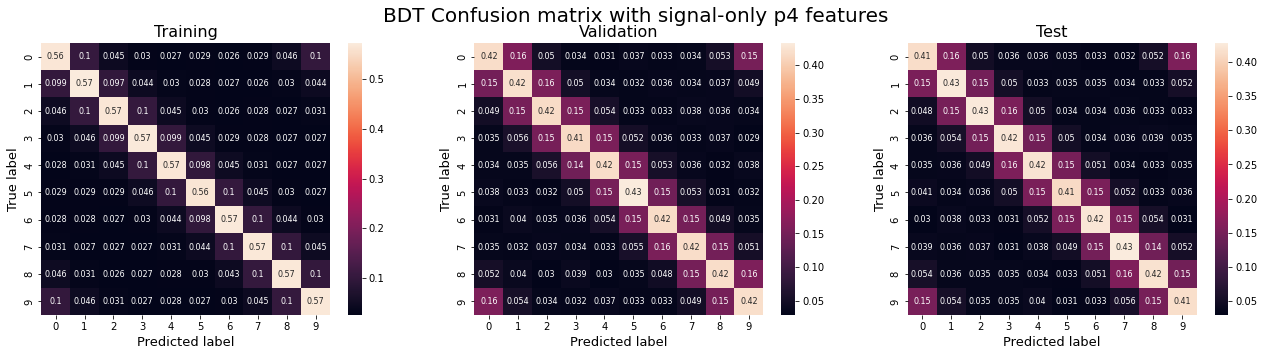

In [18]:
plot_confusion_matrix(normalize=True,
                          title='BDT Confusion matrix with signal-only p4 features')

In [19]:
feat_importance = pd.DataFrame(model.feature_importances_).T

In [20]:
feat_importance.columns = features_names
feat_importance

,n_p_x,n_p_y,n_p_z,n_E,pi-_p_x,pi-_p_y,pi-_p_z,pi-_E,pi0_1_p_x,pi0_1_p_y,...,an_p_z,an_E,pi+_p_x,pi+_p_y,pi+_p_z,pi+_E,pi0_2_p_x,pi0_2_p_y,pi0_2_p_z,pi0_2_E
0,6.44214,6.391046,0.636095,0.662265,7.633187,7.090722,2.678504,2.804651,4.982296,5.442725,...,0.581168,0.652251,7.799144,7.653965,2.596124,2.627359,4.717958,4.935819,2.442462,3.03217


/tmp/ipykernel_61737/11480423.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(),size = 7)


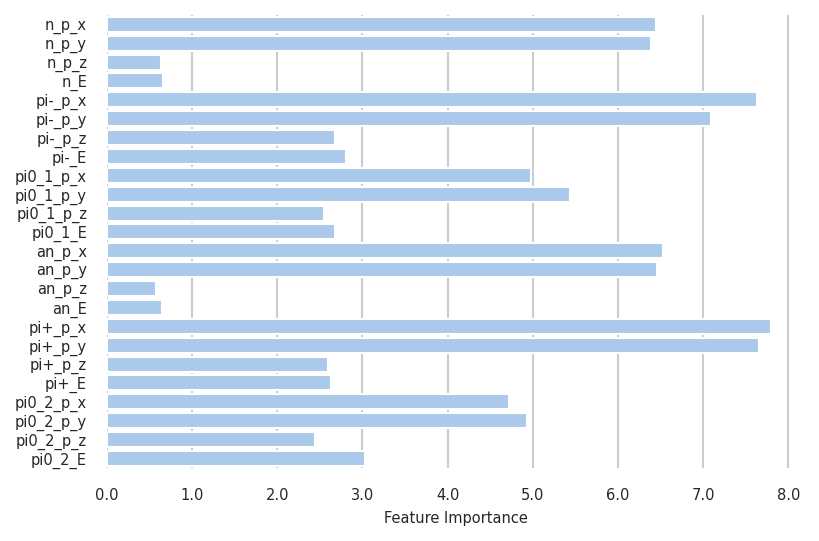

In [21]:
sns.set_theme(style="whitegrid")
fig,ax=plt.subplots(dpi=150)

sns.set_color_codes("pastel")
sns.barplot(data=feat_importance, color="b", orient="h")
ax.set_yticklabels(feat_importance, size = 7)
ax.set_xticklabels(ax.get_xticks(),size = 7)
ax.set_xlabel("Feature Importance", size = 7)
# ax.set_title("")
sns.despine(left=True, bottom=True)

### Reco-level p4 Feature Ranking

In [12]:
recon_points=pickle.load(open('HiggsCP_data/rhorho/recon_events_wo_background.pk','rb'))

In [13]:
x_train, y_train = recon_points.train.x, np.argmax(recon_points.train.weights,axis=1)
x_valid, y_valid = recon_points.valid.x, np.argmax(recon_points.valid.weights,axis=1)
x_test, y_test = recon_points.test.x, np.argmax(recon_points.test.weights,axis=1)

In [14]:
model = CatBoostClassifier(iterations=1000,
                           max_depth=12,
                           task_type="GPU",
                           devices='0')
model.fit(x_train, y_train,verbose=True)

Learning rate set to 0.093438
0:	learn: 2.2823686	total: 165ms	remaining: 2m 44s
1:	learn: 2.2598671	total: 317ms	remaining: 2m 38s
2:	learn: 2.2368984	total: 463ms	remaining: 2m 33s
3:	learn: 2.2176183	total: 597ms	remaining: 2m 28s
4:	learn: 2.1978574	total: 720ms	remaining: 2m 23s
5:	learn: 2.1752720	total: 867ms	remaining: 2m 23s
6:	learn: 2.1562821	total: 995ms	remaining: 2m 21s
7:	learn: 2.1351925	total: 1.14s	remaining: 2m 20s
8:	learn: 2.1164971	total: 1.27s	remaining: 2m 19s
9:	learn: 2.0960632	total: 1.41s	remaining: 2m 19s
10:	learn: 2.0783542	total: 1.53s	remaining: 2m 18s
11:	learn: 2.0596910	total: 1.67s	remaining: 2m 17s
12:	learn: 2.0419490	total: 1.8s	remaining: 2m 16s
13:	learn: 2.0240125	total: 1.92s	remaining: 2m 15s
14:	learn: 2.0046959	total: 2.06s	remaining: 2m 15s
15:	learn: 1.9846901	total: 2.19s	remaining: 2m 15s
16:	learn: 1.9670761	total: 2.32s	remaining: 2m 14s
17:	learn: 1.9503958	total: 2.45s	remaining: 2m 13s
18:	learn: 1.9328293	total: 2.58s	remaining: 

158:	learn: 0.5816956	total: 20.7s	remaining: 1m 49s
159:	learn: 0.5787817	total: 20.8s	remaining: 1m 49s
160:	learn: 0.5752434	total: 21s	remaining: 1m 49s
161:	learn: 0.5716658	total: 21.1s	remaining: 1m 49s
162:	learn: 0.5676074	total: 21.2s	remaining: 1m 48s
163:	learn: 0.5634734	total: 21.3s	remaining: 1m 48s
164:	learn: 0.5596321	total: 21.5s	remaining: 1m 48s
165:	learn: 0.5553225	total: 21.6s	remaining: 1m 48s
166:	learn: 0.5517006	total: 21.7s	remaining: 1m 48s
167:	learn: 0.5475636	total: 21.8s	remaining: 1m 48s
168:	learn: 0.5437599	total: 22s	remaining: 1m 48s
169:	learn: 0.5397273	total: 22.1s	remaining: 1m 47s
170:	learn: 0.5359930	total: 22.2s	remaining: 1m 47s
171:	learn: 0.5324793	total: 22.4s	remaining: 1m 47s
172:	learn: 0.5281087	total: 22.5s	remaining: 1m 47s
173:	learn: 0.5243205	total: 22.6s	remaining: 1m 47s
174:	learn: 0.5204520	total: 22.8s	remaining: 1m 47s
175:	learn: 0.5167956	total: 22.9s	remaining: 1m 47s
176:	learn: 0.5130605	total: 23s	remaining: 1m 47s

314:	learn: 0.2328140	total: 40.9s	remaining: 1m 28s
315:	learn: 0.2316958	total: 41s	remaining: 1m 28s
316:	learn: 0.2307212	total: 41.2s	remaining: 1m 28s
317:	learn: 0.2296581	total: 41.3s	remaining: 1m 28s
318:	learn: 0.2286364	total: 41.4s	remaining: 1m 28s
319:	learn: 0.2275805	total: 41.6s	remaining: 1m 28s
320:	learn: 0.2268224	total: 41.7s	remaining: 1m 28s
321:	learn: 0.2258830	total: 41.8s	remaining: 1m 28s
322:	learn: 0.2249509	total: 41.9s	remaining: 1m 27s
323:	learn: 0.2238647	total: 42.1s	remaining: 1m 27s
324:	learn: 0.2229400	total: 42.2s	remaining: 1m 27s
325:	learn: 0.2218825	total: 42.3s	remaining: 1m 27s
326:	learn: 0.2209009	total: 42.5s	remaining: 1m 27s
327:	learn: 0.2199932	total: 42.6s	remaining: 1m 27s
328:	learn: 0.2190563	total: 42.7s	remaining: 1m 27s
329:	learn: 0.2181860	total: 42.8s	remaining: 1m 26s
330:	learn: 0.2172407	total: 42.9s	remaining: 1m 26s
331:	learn: 0.2162937	total: 43.1s	remaining: 1m 26s
332:	learn: 0.2154809	total: 43.2s	remaining: 1m

470:	learn: 0.1319767	total: 1m	remaining: 1m 8s
471:	learn: 0.1316071	total: 1m 1s	remaining: 1m 8s
472:	learn: 0.1311940	total: 1m 1s	remaining: 1m 8s
473:	learn: 0.1308053	total: 1m 1s	remaining: 1m 8s
474:	learn: 0.1304206	total: 1m 1s	remaining: 1m 7s
475:	learn: 0.1300635	total: 1m 1s	remaining: 1m 7s
476:	learn: 0.1296375	total: 1m 1s	remaining: 1m 7s
477:	learn: 0.1292331	total: 1m 1s	remaining: 1m 7s
478:	learn: 0.1288232	total: 1m 1s	remaining: 1m 7s
479:	learn: 0.1284429	total: 1m 2s	remaining: 1m 7s
480:	learn: 0.1280632	total: 1m 2s	remaining: 1m 7s
481:	learn: 0.1276739	total: 1m 2s	remaining: 1m 7s
482:	learn: 0.1273055	total: 1m 2s	remaining: 1m 6s
483:	learn: 0.1269390	total: 1m 2s	remaining: 1m 6s
484:	learn: 0.1265583	total: 1m 2s	remaining: 1m 6s
485:	learn: 0.1261834	total: 1m 2s	remaining: 1m 6s
486:	learn: 0.1258465	total: 1m 3s	remaining: 1m 6s
487:	learn: 0.1255156	total: 1m 3s	remaining: 1m 6s
488:	learn: 0.1251460	total: 1m 3s	remaining: 1m 6s
489:	learn: 0.1

628:	learn: 0.0883821	total: 1m 21s	remaining: 48s
629:	learn: 0.0881959	total: 1m 21s	remaining: 47.9s
630:	learn: 0.0880093	total: 1m 21s	remaining: 47.7s
631:	learn: 0.0878137	total: 1m 21s	remaining: 47.6s
632:	learn: 0.0876541	total: 1m 21s	remaining: 47.5s
633:	learn: 0.0874580	total: 1m 21s	remaining: 47.3s
634:	learn: 0.0872845	total: 1m 22s	remaining: 47.2s
635:	learn: 0.0870978	total: 1m 22s	remaining: 47.1s
636:	learn: 0.0869007	total: 1m 22s	remaining: 46.9s
637:	learn: 0.0867083	total: 1m 22s	remaining: 46.8s
638:	learn: 0.0865411	total: 1m 22s	remaining: 46.7s
639:	learn: 0.0863531	total: 1m 22s	remaining: 46.6s
640:	learn: 0.0861789	total: 1m 22s	remaining: 46.4s
641:	learn: 0.0859897	total: 1m 23s	remaining: 46.3s
642:	learn: 0.0858043	total: 1m 23s	remaining: 46.2s
643:	learn: 0.0856407	total: 1m 23s	remaining: 46s
644:	learn: 0.0854597	total: 1m 23s	remaining: 45.9s
645:	learn: 0.0852829	total: 1m 23s	remaining: 45.8s
646:	learn: 0.0851188	total: 1m 23s	remaining: 45.

784:	learn: 0.0659475	total: 1m 41s	remaining: 27.8s
785:	learn: 0.0658363	total: 1m 41s	remaining: 27.6s
786:	learn: 0.0657270	total: 1m 41s	remaining: 27.5s
787:	learn: 0.0656107	total: 1m 41s	remaining: 27.4s
788:	learn: 0.0654932	total: 1m 41s	remaining: 27.3s
789:	learn: 0.0653829	total: 1m 42s	remaining: 27.1s
790:	learn: 0.0652712	total: 1m 42s	remaining: 27s
791:	learn: 0.0651644	total: 1m 42s	remaining: 26.9s
792:	learn: 0.0650526	total: 1m 42s	remaining: 26.7s
793:	learn: 0.0649564	total: 1m 42s	remaining: 26.6s
794:	learn: 0.0648580	total: 1m 42s	remaining: 26.5s
795:	learn: 0.0647711	total: 1m 42s	remaining: 26.3s
796:	learn: 0.0646623	total: 1m 42s	remaining: 26.2s
797:	learn: 0.0645530	total: 1m 43s	remaining: 26.1s
798:	learn: 0.0644556	total: 1m 43s	remaining: 26s
799:	learn: 0.0643497	total: 1m 43s	remaining: 25.8s
800:	learn: 0.0642359	total: 1m 43s	remaining: 25.7s
801:	learn: 0.0641318	total: 1m 43s	remaining: 25.6s
802:	learn: 0.0640248	total: 1m 43s	remaining: 25.

940:	learn: 0.0522424	total: 2m 1s	remaining: 7.61s
941:	learn: 0.0521679	total: 2m 1s	remaining: 7.48s
942:	learn: 0.0520914	total: 2m 1s	remaining: 7.35s
943:	learn: 0.0520166	total: 2m 1s	remaining: 7.22s
944:	learn: 0.0519461	total: 2m 1s	remaining: 7.09s
945:	learn: 0.0518782	total: 2m 2s	remaining: 6.97s
946:	learn: 0.0518057	total: 2m 2s	remaining: 6.84s
947:	learn: 0.0517417	total: 2m 2s	remaining: 6.71s
948:	learn: 0.0516805	total: 2m 2s	remaining: 6.58s
949:	learn: 0.0516178	total: 2m 2s	remaining: 6.45s
950:	learn: 0.0515423	total: 2m 2s	remaining: 6.32s
951:	learn: 0.0514749	total: 2m 2s	remaining: 6.19s
952:	learn: 0.0514024	total: 2m 2s	remaining: 6.06s
953:	learn: 0.0513313	total: 2m 3s	remaining: 5.93s
954:	learn: 0.0512655	total: 2m 3s	remaining: 5.8s
955:	learn: 0.0511954	total: 2m 3s	remaining: 5.68s
956:	learn: 0.0511281	total: 2m 3s	remaining: 5.55s
957:	learn: 0.0510599	total: 2m 3s	remaining: 5.42s
958:	learn: 0.0509895	total: 2m 3s	remaining: 5.29s
959:	learn: 0

<AxesSubplot:>

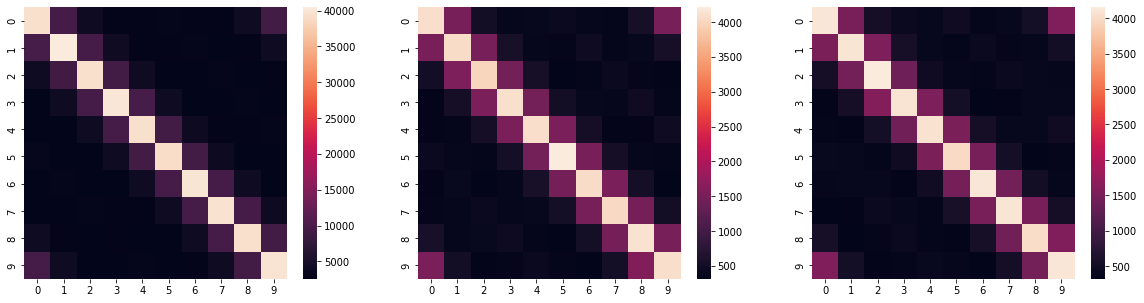

In [8]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
y_pred=model.predict(x_train)
sns.heatmap(confusion_matrix(y_pred.squeeze(), y_train),ax=ax[0])
y_pred=model.predict(x_valid)
sns.heatmap(confusion_matrix(y_pred.squeeze(), y_valid),ax=ax[1])
y_pred=model.predict(x_test)
sns.heatmap(confusion_matrix(y_pred.squeeze(), y_test),ax=ax[2])

In [18]:
feat_importance = pd.DataFrame(model.feature_importances_).T
feat_importance.columns = features_names

/tmp/ipykernel_13000/11480423.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(),size = 7)


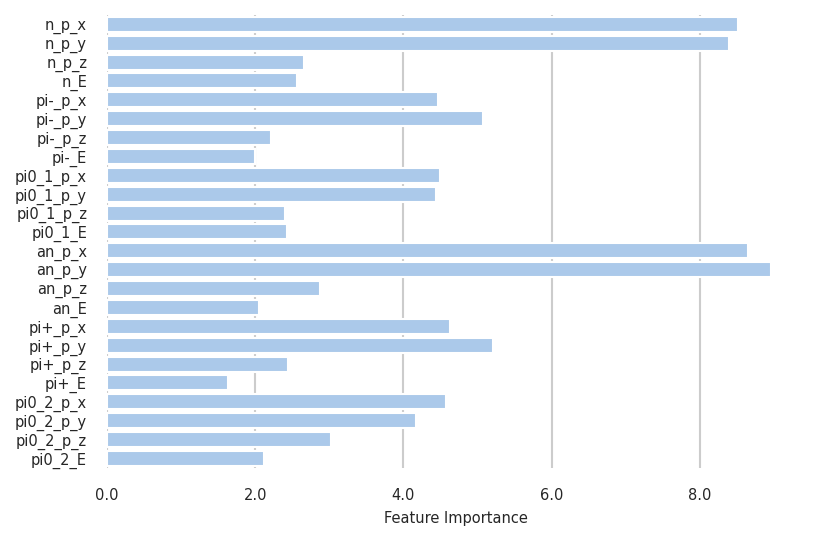

In [19]:
sns.set_theme(style="whitegrid")
fig,ax=plt.subplots(dpi=150)

sns.set_color_codes("pastel")
sns.barplot(data=feat_importance, color="b", orient="h")
ax.set_yticklabels(feat_importance, size = 7)
ax.set_xticklabels(ax.get_xticks(),size = 7)
ax.set_xlabel("Feature Importance", size = 7)
# ax.set_title("")
sns.despine(left=True, bottom=True)